![picture](https://prowly-uploads.s3.eu-west-1.amazonaws.com/uploads/4626/assets/71776/large_logo_wsb_poziom.jpg)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



import plotly.graph_objects as go

# Idea sieci rekurencyjnej

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks#architecture

Rekurencyjne sieci neuronowe (ang. Recurrent Neural Networks) to klasa sieci neuronowych, które umożliwiają wykorzystanie poprzednich wyjść jako danych wejściowych i posiadają ukryte stany – wykorzystane jest sprzężenie zwrotne

*   W tradycyjnych sieciach neuronowych wszystkie wejścia i wyjścia są od siebie niezależne.
*   W przypadku rekurencyjnych sieci neuronowych dane wejściowe z poprzednich kroków są wprowadzane na wejście stanu bieżącego.


![picture](https://www.simplilearn.com/ice9/free_resources_article_thumb/Simple_Recurrent_Neural_Network.png)

źródło:https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn

Sposób działania RNN
*   W sieci RNN informacja przechodzi przez pętlę. Kiedy podejmuje decyzję, bierze pod uwagę bieżące dane wejściowe, a także to, czego nauczył się z danych wejściowych, które otrzymał wcześniej.
*   Dzięki pamięci wewnętrznej RNN mogą zapamiętywać ważne rzeczy dotyczące otrzymanych danych wejściowych, co pozwala im bardzo precyzyjnie przewidywać, co będzie dalej.
*   Rekurencyjne sieci neuronowe mogą zapewnić znacznie głębsze zrozumienie sekwencji i jej kontekstu w porównaniu z innymi algorytmami.

„RNN = najbliższa przeszłość + teraźniejszość”





![picture](https://i.imgur.com/RW41Wqj.png)

Wejście: x(t)​ jest brane jako wejście do sieci w kroku czasowym t. Na przykład x1 może być jednokierunkowym wektorem odpowiadającym słowu w zdaniu.


Stan ukryty: h(t)​ reprezentuje stan ukryty w czasie t i działa jako „pamięć” sieci. h(t)​ jest obliczane na podstawie bieżącego wejścia i stanu ukrytego poprzedniego kroku czasowego: h(t)​ = f(U x(t)​ + W h(t−1)​). Przyjmuje się, że funkcja f jest transformacją nieliniową, taką jak tanh, ReLU.


Wagi: RNN ma wejścia do połączeń ukrytych sparametryzowane przez macierz wag U, rekurencyjne połączenia ukryte do ukrytych sparametryzowane przez macierz wag W oraz połączenia ukryte do wyjścia sparametryzowane przez macierz wag V i wszystkie te wagi (U, V, W) są dzielone w czasie.


Wyjście: o(t)​ ilustruje wyjście sieci. 





![picture](https://stanford.edu/~shervine/teaching/cs-230/illustrations/description-block-rnn-ltr.png?74e25518f882f8758439bcb3637715e5)
Obliczenia wykonywane w neuronie RNN. źródło: stanford.edu

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int) -> None:
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.i2h = nn.Linear(input_size, hidden_size, bias=False)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, hidden_state) -> tuple[torch.Tensor, torch.Tensor]:
        x = self.i2h(x)
        hidden_state = self.h2h(hidden_state)
        hidden_state = torch.tanh(x + hidden_state)
	      out = self.h2o(hidden_state)
        return out, hidden_state
        
    def init_zero_hidden(self, batch_size=1) -> torch.Tensor:
        return torch.zeros(batch_size, self.hidden_size, requires_grad=False)

Zalety sieci RNN
*   Możliwość przetwarzania danych wejściowych o dowolnej długości
*   Element listy
*   Zwiększając rozmiar danych wejściowych nie zwiększa się rozmiar
modelu
*   Wagi są współdzielone w czasie
*   Model RNN zapamiętuje każdą informację przez cały czas (pomocne w przypadku predykcji szeregów czasowych)
*   Może wykorzystywać pamięć wewnętrzną do przetwarzania dowolnych serii danych wejściowych

Wady sieci RNN
*   Ze względu na powtarzalny charakter obliczenia są powolne
*   Trudności w dostępie do informacji z dużo wcześniejszych etapów
*   Mogą pojawić się problemy eksplodowania i zanikania gradientu
*   Przy zastosowaniu relu lub tanh jako funkcji aktywacji, przetwarzanie bardzo długich sekwencji staje się bardzo trudne
*   Trenowanie modeli RNN może być trudne (dlaczego?)

## Typy architektur sieci rekurencyjnych






![picture](https://3863425935-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LIA3amopGH9NC6Rf0mA%2F-LIA3mTJltflw3MVKAEQ%2F-LIA3nSKrqNJpLgASeso%2Fsequence.png?generation=1532415397328022&alt=media)

Architektura jeden do jednego

*   Pojedyncze wejście jest mapowane na pojedyncze wyjście.
*   Przykład: Słownik ma sześć znaków: S, Z, K, O, Ł, A, wprowadzamy pierwszy znak S jako dane wejściowe, RNN oblicza prawdopodobieństwo wystąpienia wszystkich słów w słowniku, aby przewidzieć następną literę.
*   Zastosowanie: generowanie tekstu, przewidywanie słów, prognozy giełdowe

Architektura jeden do wielu
*   Pojedyncze wejście jest mapowane na różne wartości wyjściowe.
*   Przykład: W kroku czasowym t=0 słowo „dzień” jest przewidywane, a w następnym kroku czasowym t=1 poprzednio ukryty stan h0 jest używany do przewidywania następnego słowa, którym jest „dobry”.
*   Zastosowanie: automatyczne podpisy pod obrazami, generowanie muzyki

Architektura wiele do jednego
*   Sekwencja wejść jest mapowana na pojedynczą wartość wyjściową.
*   Przykład: Podczas trenowania modelu jako dane wejściowe model przyjmuje zdania jako sekwencje słów – każde słowo na osobnym wejściu, a jako wyjście sieć określa czy zdanie to jest nacechowane pozytywnie, czy negatywnie – nadaje zdaniu etykietę. „Ten telefon dobrze działa.” „Jestem rozczarowany.”
*   Jako dane wejściowe: tekst recenzji, wyjście: ocena książki, filmu.
*   Zastosowanie: ogólna klasyfikacja

Architektura wiele do wielu: Tx ≠ Ty
*   Sekwencja danych wejściowych o dowolnej długości jest odwzorowywana na sekwencję danych wyjściowych o dowolnej długości.
*   Przykład: Jako wejście do sieci podajemy zdanie w języku polskim, jako wyjście otrzymujemy zdanie przetłumaczone na język angielski. Ze względu na różne struktury gramatyczne języków liczba słów na wejściu może być inna niż na wyjściu z sieci.
*   Zastosowanie: tłumaczenie maszynowe, chatboty

Architektura wiele do wielu: Tx = Ty
*   Sekwencja danych wejściowych o długości T jest odwzorowywana na sekwencję danych wyjściowych o tej samej długości T.
*   Przykład: Jako wejście podajemy sekwencję wideo, którą sieć odczytuje jako poszczególne klatki, a jako wyjście z sieci otrzymujemy etykiety z oznaczeniami, jakie elementy pojawiły się na danej klatce.
*   Zastosowanie: Klasyfikacja wideo

## Jak sieć rekurencyjna się uczy?

Kroki do treningu rekurencyjnej sieci neuronowej
1. W warstwach wejściowych początkowe dane są wysyłane, mają one tą samą wagę oraz tą samą funkcje aktywacji.
2. Wykorzystując aktualne dane wejściowe oraz wyjście stanu poprzedniego obliczany jest obecny stan.
3. Obecny wyliczony stan stanie się stanem poprzednim dla kolejnego kroku czasowego.
4. Kroki są powtarzane, aż do przetworzenia wszystkich danych wejściowych jednocześnie korzystając z informacji z kroków poprzednich.
5. Ostatni krok jest obliczany na podstawie aktualnego stanu końcowego i wszystkich poprzednich kroków.
6. Obliczany jest błąd poprzez obliczenie różnicy
7. Następuje wsteczna propagacja błędów oraz aktualizacja wag.

![picture](https://cnvrg.io/wp-content/uploads/2020/12/Backpropagation-in-RNNs.jpg)

Propagacja wsteczna w czasie (BPTT), źródło: MIT 68191

Propagacja wsteczna w czasie
*   W jakim przypadku zapamiętywanie poprzednich okresów jest przydatne?
*   Łatwiej jest rozpoznać poruszający się obiekt, jeśli nasza sieć uwzględnia zmiany w scenie od czasu t-1 do czasu t, co wymaga pamięci czasu t-1.
*   Propagacja wsteczna w czasie to zastosowanie algorytmu propagacji wstecznej do rekurencyjnej sieci neuronowej stosowanej do danych sekwencyjnych, takich jak szeregi czasowe.
*   Jest to technika służąca do rozwijania w czasie rekurencyjnych sieci neuronowych.
*   Propagacja wsteczna w czasie (ang. Backpropagation Through Time) opiera się na gradiencie.
*   Dokonując wstecznej propagacji w czasie powodujemy, że elementy z ostatniego stanu mogą mieć wpływ na sam początek.
*   Obliczane są przejścia wstecz przez całą sekwencję dzięki czemu uzyskujemy gradienty i aktualizacje wag.
*   Jedna aktualizacja z wsteczną propagacją w czasie może rozwinąć sieć, która jest później generowana przez sekwencje wejściową.

Algorytm propagacji wstecznej w czasie
1. Przedstaw w sieci sekwencję kroków czasowych par wejścia i wyjścia.
2. Rozwiń sieć, a następnie oblicz i zsumuj błędy w każdym kroku czasowym.
3. Zwiń sieć i zaktualizuj wagi.
4. Powtórz.

# Sieć RNN w tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%cd /content/gdrive/My Drive/AI_datasets

/content/gdrive/My Drive/AI_datasets


In [6]:
data = pd.read_csv("prices.csv")

In [7]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [10]:
data.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [11]:
series = data.loc[data.symbol == 'MAT'].copy()

<Axes: >

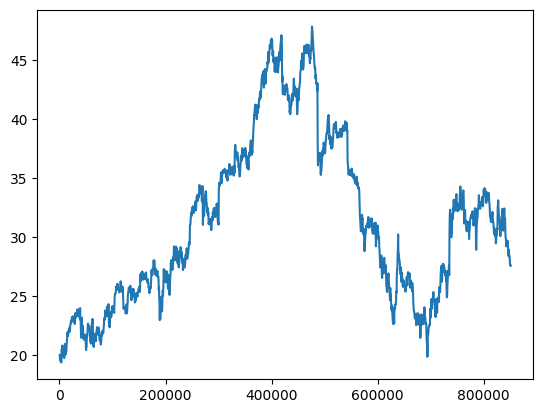

In [11]:
series.close.plot()

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
series['close'] = scaler.fit_transform(series.close.values.reshape(-1, 1))

In [14]:
train = series.iloc[:int(len(series)*0.8)].copy()
val = series.iloc[int(len(series)*0.8):].copy()

In [15]:
X_train = train[0:len(train)-1]
y_train = train[1:len(train)]


In [16]:
X_val = val[0:len(val)-1]
y_val = val[1:len(val)]


In [17]:
X_val.head()

,date,symbol,open,close,low,high,volume
675397,2015-08-10,MAT,22.969999,0.147172,22.830000,23.600000,4676600.0
675894,2015-08-11,MAT,23.350000,0.138743,23.129999,23.400000,3904600.0
676391,2015-08-12,MAT,22.920000,0.135933,22.700001,23.270000,4480800.0
676888,2015-08-13,MAT,23.410000,0.131015,22.920000,23.410000,4148700.0
677385,2015-08-14,MAT,23.100000,0.131366,22.910000,23.360001,3954600.0


In [18]:
y_val.head()

,date,symbol,open,close,low,high,volume
502719,2014-03-19,MAT,38.180000,0.662100,38.040001,38.430000,3197000.0
503209,2014-03-20,MAT,38.009998,0.676150,37.990002,38.660000,3094500.0
503699,2014-03-21,MAT,38.939999,0.679312,38.430000,38.990002,5034900.0
504189,2014-03-24,MAT,38.660000,0.684580,38.439999,38.950001,3811600.0
504679,2014-03-25,MAT,38.939999,0.681419,38.410000,38.959999,3613400.0


In [19]:
X_train.head()

,date,symbol,open,close,low,high,volume
524,2010-01-04,MAT,20.330000,0.022480,19.959999,20.330000,2975900.0
992,2010-01-05,MAT,19.900000,0.008079,19.330000,20.059999,5206100.0
1460,2010-01-06,MAT,19.500000,0.005269,19.190001,19.580000,6354900.0
1928,2010-01-07,MAT,19.700001,0.022831,19.639999,20.070000,9714500.0
2396,2010-01-08,MAT,19.910000,0.014752,19.740000,20.059999,3362600.0


In [20]:
y_train.head()

,date,symbol,open,close,low,high,volume
992,2010-01-05,MAT,19.900000,0.008079,19.330000,20.059999,5206100.0
1460,2010-01-06,MAT,19.500000,0.005269,19.190001,19.580000,6354900.0
1928,2010-01-07,MAT,19.700001,0.022831,19.639999,20.070000,9714500.0
2396,2010-01-08,MAT,19.910000,0.014752,19.740000,20.059999,3362600.0
2864,2010-01-11,MAT,19.790001,0.019319,19.660000,19.980000,5180500.0


In [114]:
tf.keras.backend.clear_session()

In [115]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=15, verbose=0, mode='min', restore_best_weights=True)

In [96]:
model = tf.keras.Sequential()
model.add(layers.SimpleRNN(32, input_shape = (None,1)))
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = model.fit(
    X_train.close, 
    y_train.close, 
    batch_size = 5, 
    validation_data = (X_val.close, y_val.close),
    epochs = 100,
    callbacks=[early_stop])

Epoch 1/100
212/212 [==============================] - 2s 4ms/step - loss: 0.0070 - val_loss: 2.6521e-04
Epoch 2/100
212/212 [==============================] - 1s 4ms/step - loss: 2.8808e-04 - val_loss: 2.8747e-04
Epoch 3/100
212/212 [==============================] - 1s 3ms/step - loss: 2.9028e-04 - val_loss: 2.5542e-04
Epoch 4/100
212/212 [==============================] - 1s 6ms/step - loss: 2.8279e-04 - val_loss: 3.0964e-04
Epoch 5/100
212/212 [==============================] - 1s 4ms/step - loss: 2.8901e-04 - val_loss: 2.5237e-04
Epoch 6/100
212/212 [==============================] - 1s 4ms/step - loss: 2.9525e-04 - val_loss: 2.8606e-04
Epoch 7/100
212/212 [==============================] - 1s 4ms/step - loss: 2.9019e-04 - val_loss: 2.6938e-04
Epoch 8/100
212/212 [==============================] - 1s 4ms/step - loss: 3.1694e-04 - val_loss: 5.6126e-04
Epoch 9/100
212/212 [==============================] - 1s 3ms/step - loss: 3.1106e-04 - val_loss: 2.4224e-04
Epoch 10/100
212/212 [=

<Figure size 640x480 with 0 Axes>

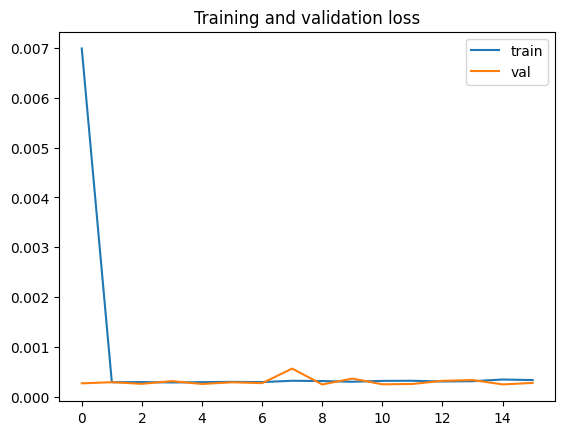

<Figure size 640x480 with 0 Axes>

In [98]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train','val'])
plt.title('Training and validation loss')
plt.figure()

In [99]:
predicted = model.predict(X_val.close)

11/11 [==============================] - 0s 2ms/step


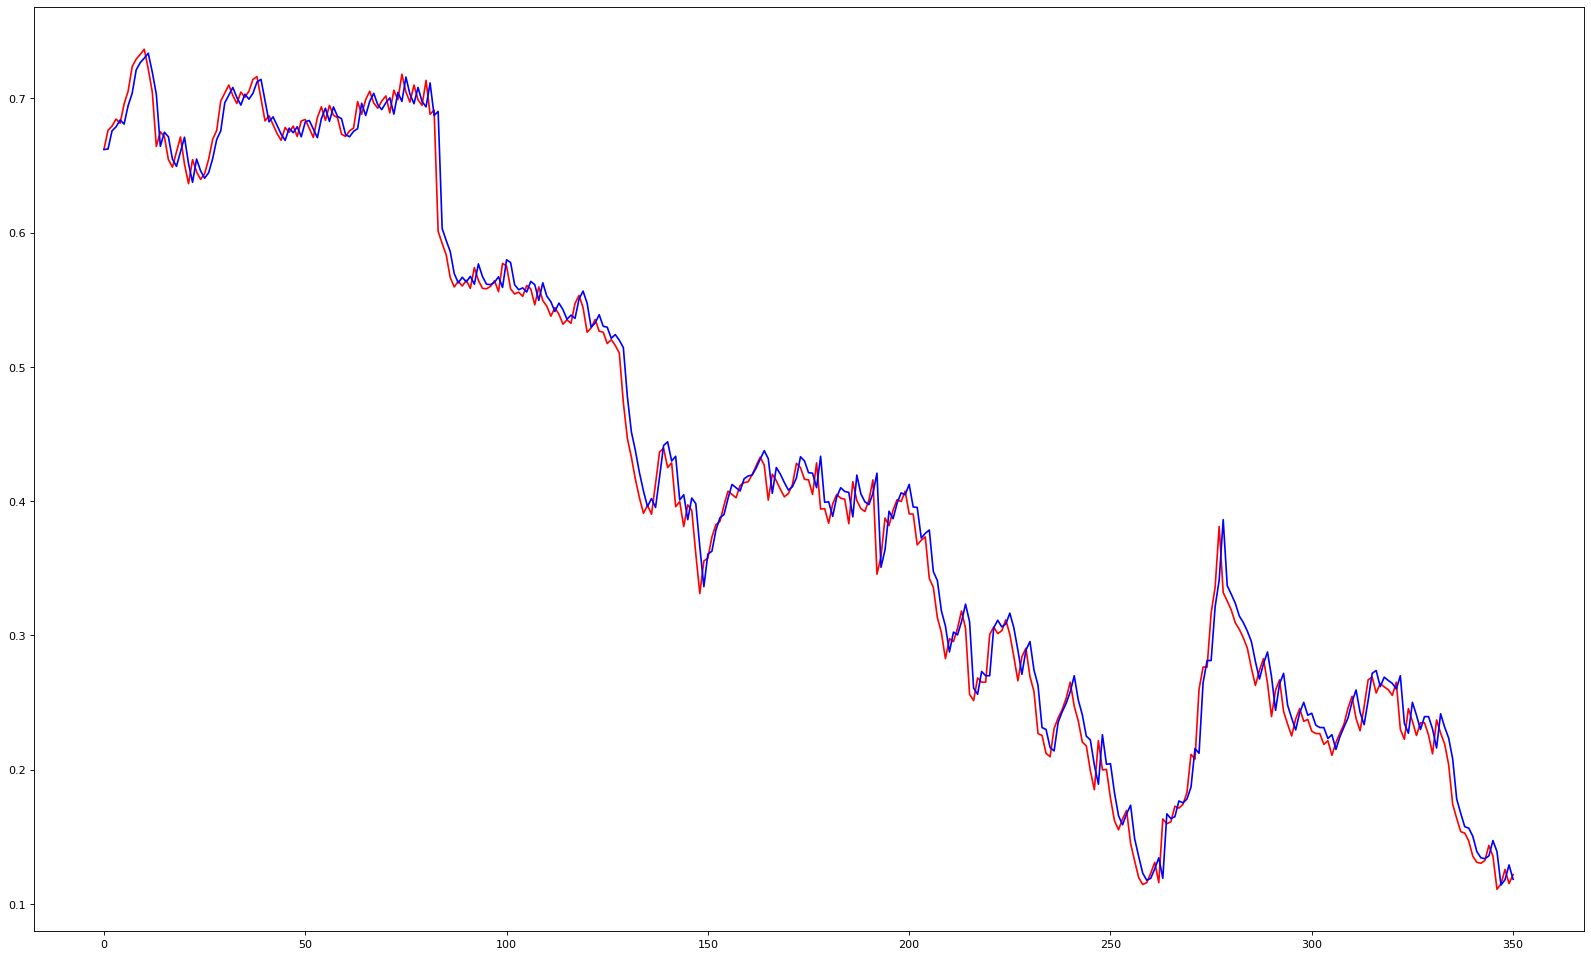

In [100]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(y_val.close.values, color = 'red', label = 'Real')
plt.plot(predicted, color = 'blue', label = 'Predicted')
plt.show()

In [102]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_val.date.values, y=predicted.reshape(len(predicted)),
            mode='markers',
            name='Predykcje'))
fig.add_trace(go.Scatter(x=y_val.date.values, y=y_val.close.values,
                    mode='markers',
                    name='Wartości rzeczywiste'))
fig.show()

## Jak zwiększyć okno?

In [117]:
from tensorflow.keras.utils import timeseries_dataset_from_array

In [118]:
window = 15

In [119]:
train_window = timeseries_dataset_from_array(
  train.close, train.close[window:], sequence_length=window, sequence_stride=1, batch_size = 100)

In [120]:
for batch in train_window.take(1):
  inputs, targets = batch

In [121]:
inputs[0]

<tf.Tensor: shape=(15,), dtype=float64, numpy=
array([0.0224798 , 0.00807868, 0.0052687 , 0.02283105, 0.01475237,
       0.01931858, 0.        , 0.0224798 , 0.0396909 , 0.032666  ,
       0.05022835, 0.04320337, 0.04320337, 0.02107485, 0.02142603])>

In [122]:
targets[0]

<tf.Tensor: shape=(), dtype=float64, numpy=0.017562346329469625>

In [123]:
val_window = timeseries_dataset_from_array(
  val.close, val.close[window:], sequence_length=window, sequence_stride=1, batch_size = 100)

In [124]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Ftrl

In [125]:
tf.keras.backend.clear_session()

In [111]:
model = keras.Sequential()
model.add(layers.Input(shape=(window, 1)))
model.add(layers.SimpleRNN(256))
model.add(layers.Dense(1))
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [126]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=0.0005, 
                                            patience=50, 
                                            verbose=0, 
                                            mode='min', 
                                            restore_best_weights=True)

In [113]:
history = model.fit(
    train_window, 
    epochs = 100,
    callbacks=[early_stop],
    validation_data=val_window)

Epoch 1/100
11/11 [==============================] - 2s 79ms/step - loss: 0.0197 - val_loss: 0.0052
Epoch 2/100
11/11 [==============================] - 1s 55ms/step - loss: 0.0151 - val_loss: 0.0100
Epoch 3/100
11/11 [==============================] - 1s 56ms/step - loss: 0.0081 - val_loss: 0.0022
Epoch 4/100
11/11 [==============================] - 1s 56ms/step - loss: 0.0109 - val_loss: 0.0025
Epoch 5/100
11/11 [==============================] - 1s 54ms/step - loss: 0.0103 - val_loss: 0.0032
Epoch 6/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0125 - val_loss: 0.0053
Epoch 7/100
11/11 [==============================] - 1s 89ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 8/100
11/11 [==============================] - 1s 87ms/step - loss: 0.0124 - val_loss: 0.0161
Epoch 9/100
11/11 [==============================] - 1s 90ms/step - loss: 0.0082 - val_loss: 0.0110
Epoch 10/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0052 - val_loss: 0.0016

<Figure size 640x480 with 0 Axes>

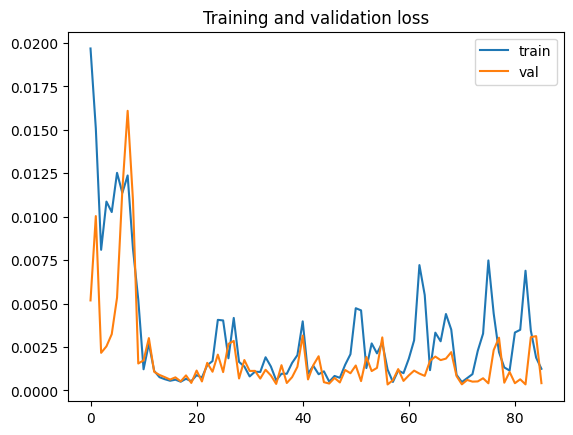

<Figure size 640x480 with 0 Axes>

In [114]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train','val'])
plt.title('Training and validation loss')
plt.figure()

In [115]:
predictions = model.predict(val_window)

4/4 [==============================] - 0s 40ms/step


In [116]:
predictions.shape

(337, 1)

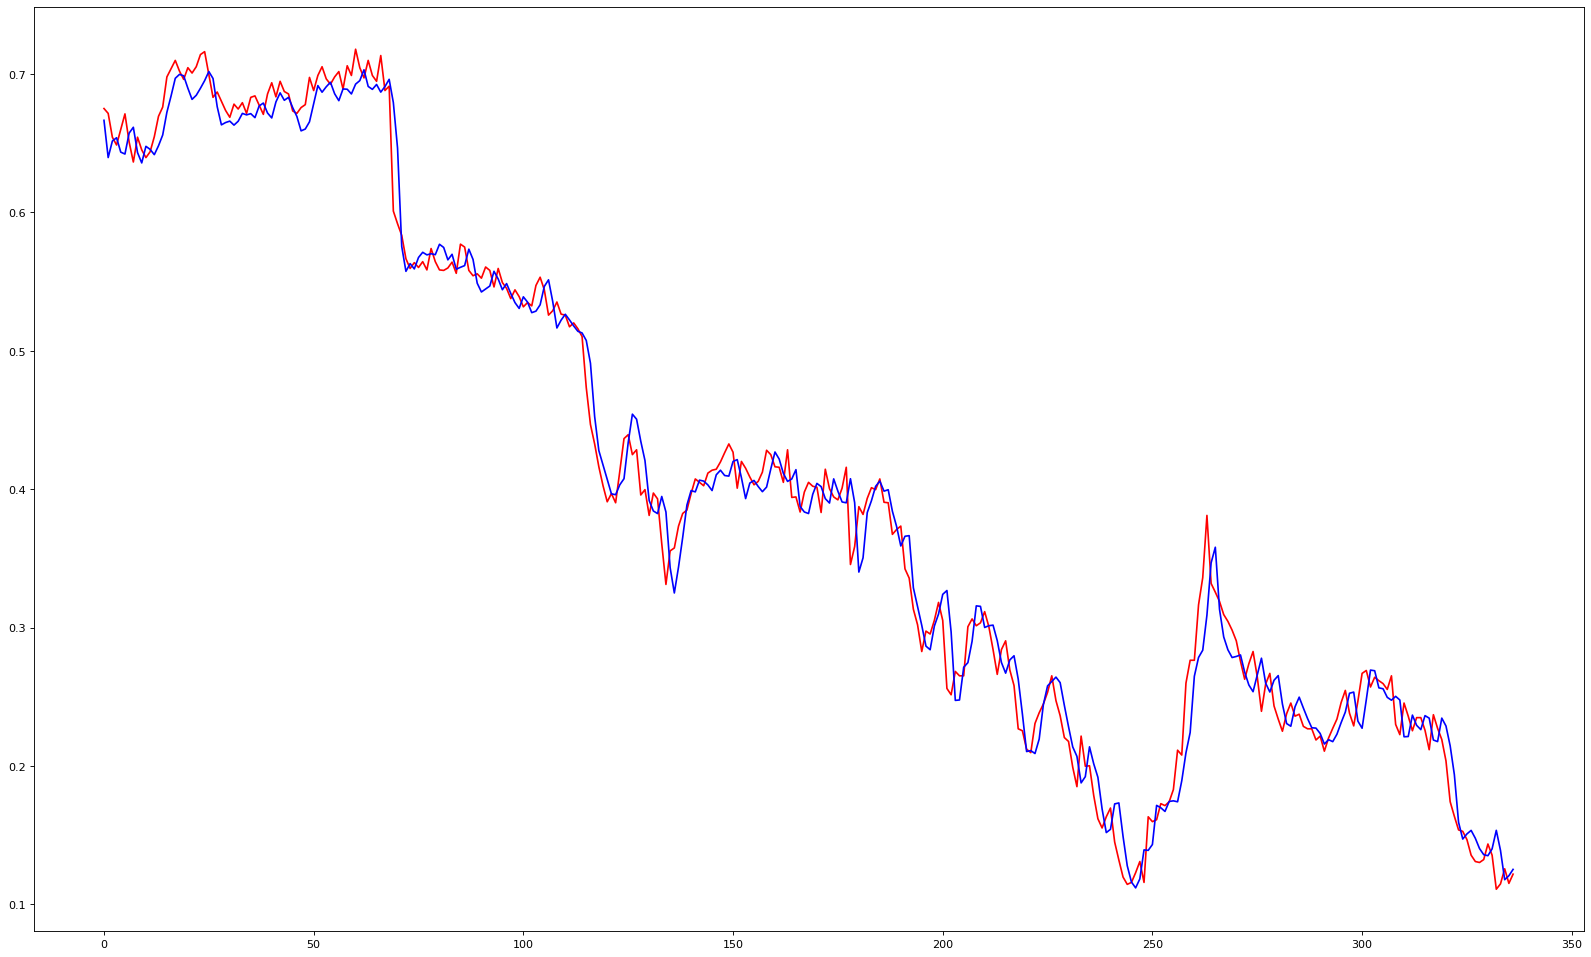

In [117]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(val.close.values[window:], color = 'red', label = 'Real')
plt.plot(predictions, color = 'blue', label = 'Predicted')
plt.show()

In [118]:
predictions = model.predict(train_window)

11/11 [==============================] - 0s 20ms/step


In [119]:
predictions.shape

(1042, 1)

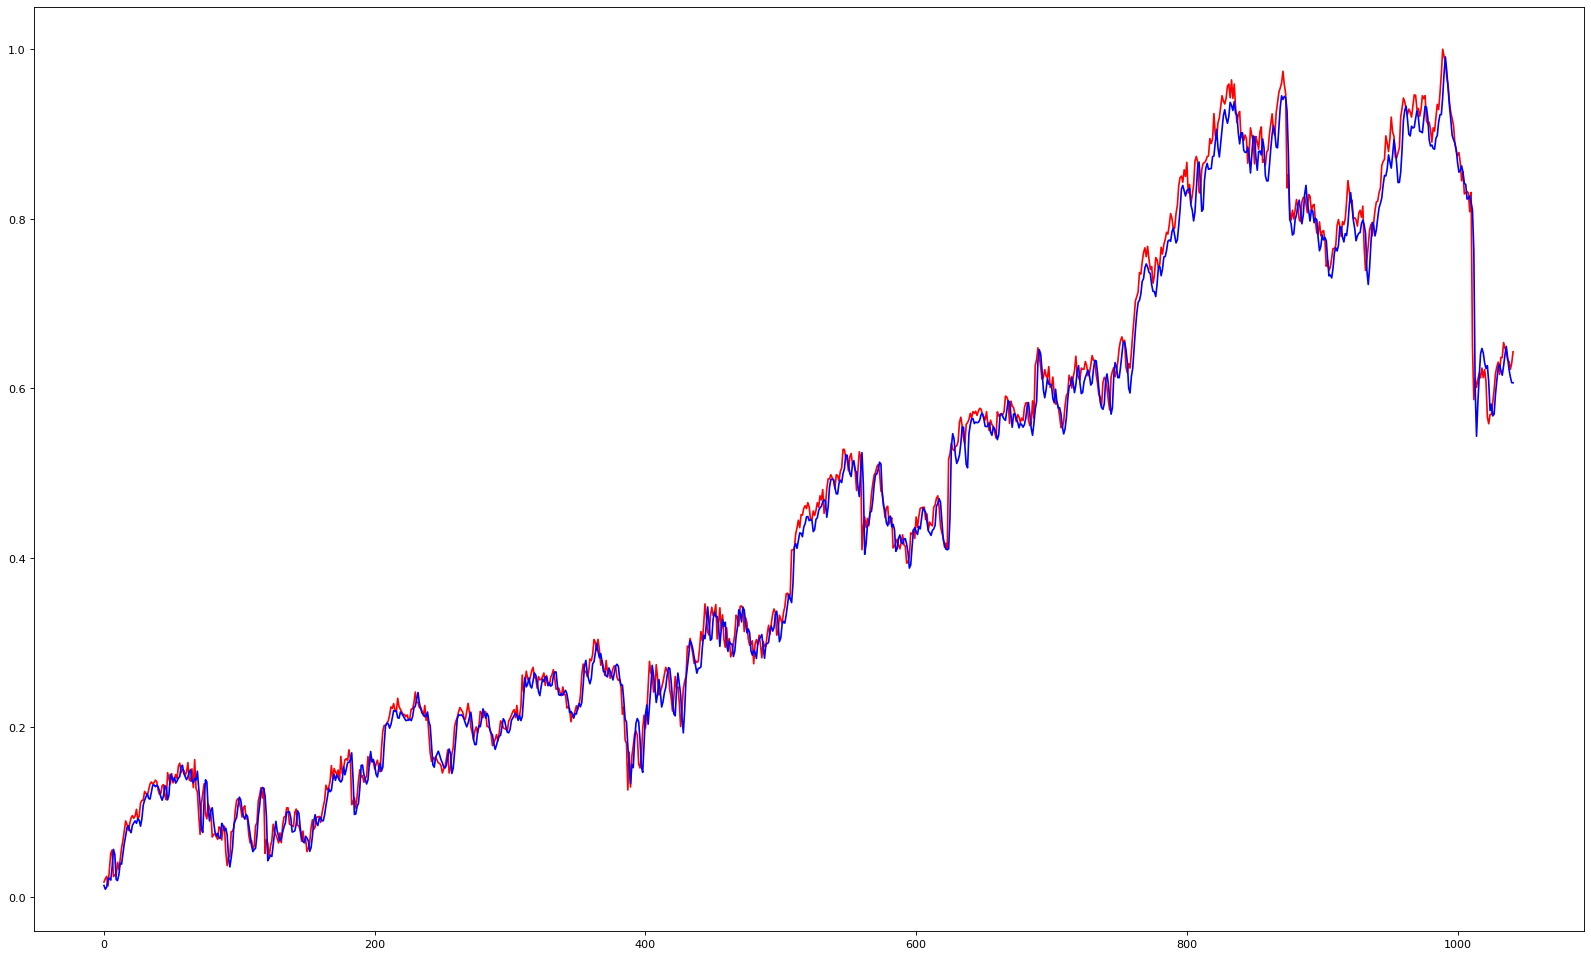

In [120]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(train.close.values[window:], color = 'red', label = 'Real')
plt.plot(predictions, color = 'blue', label = 'Predicted')
plt.show()

### Zadanie
Przetestuj skrypt dla 2 wybranych akcji z giełdy. Czy dla którejś sieć przewiduje poprawnie wartości na zbiorze walidacyjnym?

# Sieć RNN w pytorch

In [18]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from tqdm import tqdm
from torch.autograd import Variable
import copy

In [19]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch, lr):
  model.train()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  train_loss, correct = 0, 0
  running_size = 0
  running_batches = 0
  for X_batch, y_batch in (pbar := tqdm(dataloader, desc = 'Train: ')):
    X_batch = Variable(X_batch.view(-1, 1, X_batch.size(1)))
    y_pred = model(X_batch)
    loss = loss_fn(y_pred, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    running_size += len(y_batch)
    running_batches +=1
    pbar.set_postfix_str(f"loss: {float(train_loss/running_batches)}, [{running_size}/{size}]")

  train_loss /= num_batches


def test_loop(dataloader, model, loss_fn, epoch, lr):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0
  running_size = 0
  running_batches = 0

  for X_batch, y_batch in (pbar := tqdm(dataloader, desc = 'Validation: ')):
    X_batch = Variable(X_batch.view(-1, 1, X_batch.size(1)))
    y_pred = model(X_batch)
    loss = loss_fn(y_pred, y_batch)
    test_loss += loss.item()
    running_size += len(y_batch)
    running_batches +=1
    pbar.set_postfix_str(f"loss: {float(test_loss/running_batches)}, [{running_size}/{size}]")

  test_loss /= num_batches
  return test_loss

class EarlyStopping:
  def __init__(self, patience=10, min_delta=0):

    self.patience = patience
    self.min_delta = min_delta
    self.counter = 0
    self.best_weights = None
    self.best_loss = np.inf

  def __call__(self, validation_loss, model):
    self._update_best_model_(validation_loss)
    if (self.best_loss - validation_loss) < self.min_delta:
      self.counter +=1
      if self.counter >= self.patience:  
          return True
    else:
      self.counter = 0
      self.best_loss = validation_loss
    return False

  def _update_best_model_(self, validation_loss):
    if validation_loss < self.best_loss:
      self.best_weights = copy.deepcopy(model.state_dict())


In [20]:
# Create RNN Model

# https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(RNNModel, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.num_layers = num_layers
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, nonlinearity='relu', batch_first=True)
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_dim))
            
        # One time step
        out, hidden_state = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

## Przygotowanie danych

In [59]:
from torch.utils.data import TensorDataset, DataLoader

In [60]:
X_train_torch = torch.tensor(X_train.close.values.reshape(-1, 1), dtype=torch.float32)
y_train_torch = torch.tensor(y_train.close.values.reshape(-1, 1), dtype=torch.float32)
X_val_torch = torch.tensor(X_val.close.values.reshape(-1, 1), dtype=torch.float32)
y_val_torch = torch.tensor(y_val.close.values.reshape(-1, 1), dtype=torch.float32)


In [61]:
# X_train_torch = torch.reshape(X_train_torch,   (X_train_torch.shape[0], 1, X_train_torch.shape[1]))
# y_train_torch = torch.reshape(y_train_torch,   (y_train_torch.shape[0], 1, y_train_torch.shape[1]))
# X_val_torch = torch.reshape(X_val_torch,   (X_val_torch.shape[0], 1, X_val_torch.shape[1]))
# y_val_torch = torch.reshape(y_val_torch,   (y_val_torch.shape[0], 1, y_val_torch.shape[1]))

# X_train_tensors = Variable(torch.Tensor(X_train))
# X_test_tensors = Variable(torch.Tensor(X_test))

# y_train_tensors = Variable(torch.Tensor(y_train))
# y_test_tensors = Variable(torch.Tensor(y_test)) 

In [62]:
train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), shuffle=True, batch_size=8)
val_loader = DataLoader(TensorDataset(X_val_torch , y_val_torch), shuffle=True, batch_size=8)

In [63]:
batch_x, batch_t = next(iter(train_loader))

In [64]:
batch_x.size()

torch.Size([8, 1])

In [72]:
model = RNNModel(input_dim = 1, hidden_dim = 32, num_layers = 1, output_dim = 1)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
n_epochs = 100
early_stopping = EarlyStopping(patience=50, min_delta=0.0001)
lr = 0.001

In [73]:
for epoch in range(n_epochs):
      print(f"Epoch {epoch+1}\n-------------------------------")
      train_loop(train_loader, model, loss_fn, optimizer, epoch, lr)
      test_loss = test_loop(val_loader, model, loss_fn, epoch, lr)
      if early_stopping(validation_loss = test_loss, model = model):
        print(f'\n-------------------------------\nEarly stopped at epoch {epoch+1}')
        model.load_state_dict(early_stopping.best_weights)
        break

Epoch 1
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 316.26it/s, loss: 0.01141067521067188, [352/352]]


Epoch 2
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 285.61it/s, loss: 0.001378139426378766, [352/352]]


Epoch 3
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 365.77it/s, loss: 0.0003699493961242049, [352/352]]


Epoch 4
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 374.70it/s, loss: 0.00037378404017958513, [352/352]]


Epoch 5
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 429.94it/s, loss: 0.0003698913341478064, [352/352]]


Epoch 6
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 393.01it/s, loss: 0.0003853376810266954, [352/352]]


Epoch 7
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 433.05it/s, loss: 0.0003811277849970131, [352/352]]


Epoch 8
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 335.39it/s, loss: 0.0003803762399250197, [352/352]]


Epoch 9
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 424.18it/s, loss: 0.0004222147105214059, [352/352]]


Epoch 10
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 335.31it/s, loss: 0.00038255806430242956, [352/352]]


Epoch 11
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 325.41it/s, loss: 0.00037168600986412707, [352/352]]


Epoch 12
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 379.99it/s, loss: 0.00037030419447215866, [352/352]]


Epoch 13
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 424.37it/s, loss: 0.00037828573294973467, [352/352]]


Epoch 14
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 418.97it/s, loss: 0.000369050238904575, [352/352]]


Epoch 15
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 381.31it/s, loss: 0.00037571330374868756, [352/352]]


Epoch 16
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 383.24it/s, loss: 0.00037689705418002137, [352/352]]


Epoch 17
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 397.06it/s, loss: 0.00037384245760304936, [352/352]]


Epoch 18
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 355.52it/s, loss: 0.00037843534515890167, [352/352]]


Epoch 19
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 350.27it/s, loss: 0.00038606399836928836, [352/352]]


Epoch 20
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 402.86it/s, loss: 0.0003806530052811881, [352/352]]


Epoch 21
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 299.90it/s, loss: 0.0003712169479761294, [352/352]]


Epoch 22
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 308.15it/s, loss: 0.0004941298217421387, [352/352]]


Epoch 23
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 346.47it/s, loss: 0.0004512676370557694, [352/352]]


Epoch 24
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 337.94it/s, loss: 0.0003756495699979661, [352/352]]


Epoch 25
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 281.74it/s, loss: 0.0003741474852590314, [352/352]]


Epoch 26
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 421.93it/s, loss: 0.00039908917196126737, [352/352]]


Epoch 27
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 413.56it/s, loss: 0.0003918328047802788, [352/352]]


Epoch 28
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 340.37it/s, loss: 0.00039421663016334855, [352/352]]


Epoch 29
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 340.55it/s, loss: 0.00036846363020066, [352/352]]


Epoch 30
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 329.44it/s, loss: 0.000426506520108722, [352/352]]


Epoch 31
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 366.05it/s, loss: 0.0003872318510812792, [352/352]]


Epoch 32
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 337.75it/s, loss: 0.0004119169484924483, [352/352]]


Epoch 33
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 385.03it/s, loss: 0.00040442549900696827, [352/352]]


Epoch 34
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 386.57it/s, loss: 0.0004172811725104773, [352/352]]


Epoch 35
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 410.05it/s, loss: 0.00036895039126896086, [352/352]]


Epoch 36
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 291.70it/s, loss: 0.0004041735679824011, [352/352]]


Epoch 37
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 326.64it/s, loss: 0.0004513678984287915, [352/352]]


Epoch 38
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 400.14it/s, loss: 0.00037045483738686676, [352/352]]


Epoch 39
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 346.44it/s, loss: 0.0004198350847714623, [352/352]]


Epoch 40
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 128.58it/s, loss: 0.00047424646105686077, [352/352]]


Epoch 41
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 342.00it/s, loss: 0.0005681324539843693, [352/352]]


Epoch 42
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 370.98it/s, loss: 0.0003698078235174762, [352/352]]


Epoch 43
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 234.40it/s, loss: 0.00037260633110814854, [352/352]]


Epoch 44
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 360.54it/s, loss: 0.0003842376950573949, [352/352]]


Epoch 45
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 378.52it/s, loss: 0.0004209252677934604, [352/352]]


Epoch 46
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 400.19it/s, loss: 0.00037283303357650186, [352/352]]


Epoch 47
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 329.93it/s, loss: 0.00037998206095256717, [352/352]]


Epoch 48
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 416.22it/s, loss: 0.0003733298228987471, [352/352]]


Epoch 49
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 431.39it/s, loss: 0.000374533867712175, [352/352]]


Epoch 50
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 328.60it/s, loss: 0.00037355427445039493, [352/352]]


Epoch 51
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 242.81it/s, loss: 0.00037656287200992335, [352/352]]


Epoch 52
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 155.20it/s, loss: 0.0003983411902895155, [352/352]]


Epoch 53
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 362.21it/s, loss: 0.0003877276827882848, [352/352]]


-------------------------------
Early stopped at epoch 53


In [74]:
X_val_torch

tensor([[0.1472],
        [0.1387],
        [0.1359],
        [0.1310],
        [0.1314],
        [0.1426],
        [0.1247],
        [0.1110],
        [0.1198],
        [0.1135],
        [0.0734],
        [0.0734],
        [0.0843],
        [0.1222],
        [0.1352],
        [0.1433],
        [0.1131],
        [0.1257],
        [0.1317],
        [0.1219],
        [0.1282],
        [0.1215],
        [0.1198],
        [0.1142],
        [0.1184],
        [0.1324],
        [0.1644],
        [0.1574],
        [0.1296],
        [0.1349],
        [0.1236],
        [0.1184],
        [0.1142],
        [0.1152],
        [0.0794],
        [0.0590],
        [0.0601],
        [0.0169],
        [0.0204],
        [0.0797],
        [0.0825],
        [0.0868],
        [0.1047],
        [0.1054],
        [0.1103],
        [0.1096],
        [0.1113],
        [0.1117],
        [0.1595],
        [0.1331],
        [0.1556],
        [0.1581],
        [0.1805],
        [0.1893],
        [0.1805],
        [0

In [75]:
X_val_torch.view(-1, 2, 1)

tensor([[[0.1472],
         [0.1387]],

        [[0.1359],
         [0.1310]],

        [[0.1314],
         [0.1426]],

        [[0.1247],
         [0.1110]],

        [[0.1198],
         [0.1135]],

        [[0.0734],
         [0.0734]],

        [[0.0843],
         [0.1222]],

        [[0.1352],
         [0.1433]],

        [[0.1131],
         [0.1257]],

        [[0.1317],
         [0.1219]],

        [[0.1282],
         [0.1215]],

        [[0.1198],
         [0.1142]],

        [[0.1184],
         [0.1324]],

        [[0.1644],
         [0.1574]],

        [[0.1296],
         [0.1349]],

        [[0.1236],
         [0.1184]],

        [[0.1142],
         [0.1152]],

        [[0.0794],
         [0.0590]],

        [[0.0601],
         [0.0169]],

        [[0.0204],
         [0.0797]],

        [[0.0825],
         [0.0868]],

        [[0.1047],
         [0.1054]],

        [[0.1103],
         [0.1096]],

        [[0.1113],
         [0.1117]],

        [[0.1595],
         [0.1331]],



In [76]:
predictions = model(Variable(X_val_torch.view(-1, 1, 1)))

In [77]:
predictions

tensor([[0.1472],
        [0.1389],
        [0.1361],
        [0.1312],
        [0.1315],
        [0.1427],
        [0.1249],
        [0.1113],
        [0.1200],
        [0.1137],
        [0.0740],
        [0.0740],
        [0.0848],
        [0.1225],
        [0.1354],
        [0.1434],
        [0.1134],
        [0.1260],
        [0.1319],
        [0.1221],
        [0.1284],
        [0.1218],
        [0.1200],
        [0.1144],
        [0.1186],
        [0.1326],
        [0.1643],
        [0.1574],
        [0.1298],
        [0.1350],
        [0.1239],
        [0.1186],
        [0.1144],
        [0.1155],
        [0.0799],
        [0.0597],
        [0.0607],
        [0.0178],
        [0.0213],
        [0.0802],
        [0.0830],
        [0.0872],
        [0.1050],
        [0.1057],
        [0.1106],
        [0.1099],
        [0.1116],
        [0.1120],
        [0.1594],
        [0.1333],
        [0.1556],
        [0.1581],
        [0.1804],
        [0.1891],
        [0.1804],
        [0

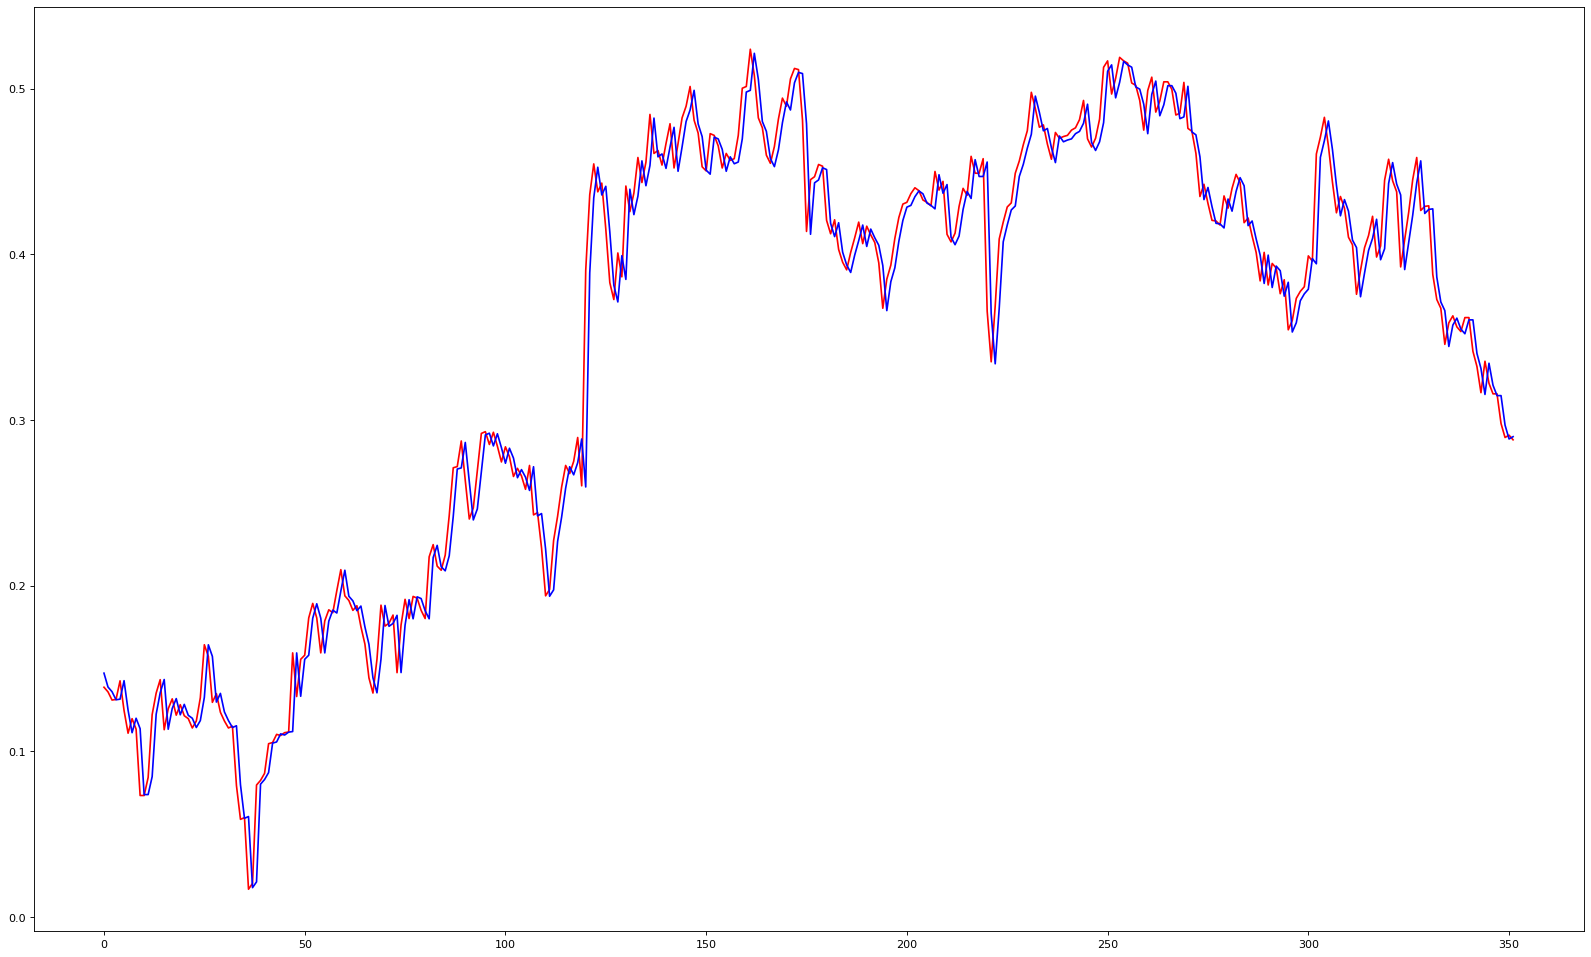

In [78]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(y_val.close.values, color = 'red', label = 'Real')
plt.plot(predictions.detach().numpy(), color = 'blue', label = 'Predicted')
plt.show()

Okno w pytorch 

In [92]:
class TimeseriesDataset(torch.utils.data.Dataset):   
    def __init__(self, X, y, window=1):
        self.X = X
        self.y = y
        self.window = window

    def __len__(self):
        return self.X.__len__() - (self.window-1)

    def __getitem__(self, index):
        return (self.X[index:index+self.window], self.y[index+self.window-1])

In [93]:
train_loader = DataLoader(TimeseriesDataset(X_train_torch, y_train_torch, window=window), shuffle=True, batch_size=8) # w modelowaniu zamien na True
val_loader = DataLoader(TimeseriesDataset(X_val_torch , y_val_torch, window=window), shuffle=True, batch_size=8)

In [94]:
batch_x, batch_y = next(iter(train_loader))

In [82]:
batch_x.size(1)

15

In [83]:
batch_x[0:3]

tensor([[[0.0225],
         [0.0081],
         [0.0053],
         [0.0228],
         [0.0148],
         [0.0193],
         [0.0000],
         [0.0225],
         [0.0397],
         [0.0327],
         [0.0502],
         [0.0432],
         [0.0432],
         [0.0211],
         [0.0214]],

        [[0.0081],
         [0.0053],
         [0.0228],
         [0.0148],
         [0.0193],
         [0.0000],
         [0.0225],
         [0.0397],
         [0.0327],
         [0.0502],
         [0.0432],
         [0.0432],
         [0.0211],
         [0.0214],
         [0.0176]],

        [[0.0053],
         [0.0228],
         [0.0148],
         [0.0193],
         [0.0000],
         [0.0225],
         [0.0397],
         [0.0327],
         [0.0502],
         [0.0432],
         [0.0432],
         [0.0211],
         [0.0214],
         [0.0176],
         [0.0214]]])

In [84]:
batch_y[0:2]

tensor([[0.0176],
        [0.0214]])

In [95]:
model = RNNModel(input_dim = window, hidden_dim = 32, num_layers = 1, output_dim = 1)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
n_epochs = 100
early_stopping = EarlyStopping(patience=50, min_delta=0.0001)
lr = 0.001

In [96]:
for epoch in range(n_epochs):
      print(f"Epoch {epoch+1}\n-------------------------------")
      train_loop(train_loader, model, loss_fn, optimizer, epoch, lr)
      test_loss = test_loop(val_loader, model, loss_fn, epoch, lr)
      if early_stopping(validation_loss = test_loss, model = model):
        print(f'\n-------------------------------\nEarly stopped at epoch {epoch+1}')
        model.load_state_dict(early_stopping.best_weights)
        break

Epoch 1
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 421.29it/s, loss: 0.0015479189358640808, [338/338]]


Epoch 2
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 365.98it/s, loss: 0.0014007559674250524, [338/338]]


Epoch 3
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 372.82it/s, loss: 0.0011677085482894422, [338/338]]


Epoch 4
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 413.65it/s, loss: 0.0010633641958160888, [338/338]]


Epoch 5
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 379.49it/s, loss: 0.0011724844425348132, [338/338]]


Epoch 6
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 398.15it/s, loss: 0.0009731130267027766, [338/338]]


Epoch 7
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 360.51it/s, loss: 0.0008250723280240023, [338/338]]


Epoch 8
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 293.06it/s, loss: 0.0007419491347147499, [338/338]]


Epoch 9
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 370.41it/s, loss: 0.0007590196196255166, [338/338]]


Epoch 10
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 455.43it/s, loss: 0.0007114317653928125, [338/338]]


Epoch 11
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 363.67it/s, loss: 0.0008516766741427832, [338/338]]


Epoch 12
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 217.87it/s, loss: 0.0006364156433846802, [338/338]]


Epoch 13
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 311.75it/s, loss: 0.0008366083199033773, [338/338]]


Epoch 14
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 261.50it/s, loss: 0.0006193412688823395, [338/338]]


Epoch 15
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 283.40it/s, loss: 0.0008177103059837422, [338/338]]


Epoch 16
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 252.63it/s, loss: 0.0006712670350003295, [338/338]]


Epoch 17
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 374.55it/s, loss: 0.00060577247512451, [338/338]]


Epoch 18
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 388.13it/s, loss: 0.0005603861122941707, [338/338]]


Epoch 19
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 397.54it/s, loss: 0.0005377035949793428, [338/338]]


Epoch 20
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 417.14it/s, loss: 0.0006108376164352088, [338/338]]


Epoch 21
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 328.64it/s, loss: 0.0005696811090591689, [338/338]]


Epoch 22
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 253.92it/s, loss: 0.0008146435873133542, [338/338]]


Epoch 23
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 266.90it/s, loss: 0.0005554105811698232, [338/338]]


Epoch 24
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 362.60it/s, loss: 0.0005216455478952158, [338/338]]


Epoch 25
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 446.21it/s, loss: 0.0004957321383868517, [338/338]]


Epoch 26
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 422.50it/s, loss: 0.0005957850383332021, [338/338]]


Epoch 27
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 413.71it/s, loss: 0.0005547241087824236, [338/338]]


Epoch 28
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 395.57it/s, loss: 0.0005376331588025963, [338/338]]


Epoch 29
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 309.09it/s, loss: 0.0006709028086841626, [338/338]]


Epoch 30
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 420.33it/s, loss: 0.0004923874910800382, [338/338]]


Epoch 31
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 407.19it/s, loss: 0.0005647827257594461, [338/338]]


Epoch 32
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 396.75it/s, loss: 0.0004770804585267649, [338/338]]


Epoch 33
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 90.11it/s, loss: 0.00045146244976718283, [338/338]]


Epoch 34
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 365.76it/s, loss: 0.0004539069080681995, [338/338]]


Epoch 35
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 437.66it/s, loss: 0.00045792032831868285, [338/338]]


Epoch 36
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 278.09it/s, loss: 0.0005084934006824136, [338/338]]


Epoch 37
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 273.02it/s, loss: 0.0004659141376641644, [338/338]]


Epoch 38
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 351.38it/s, loss: 0.0004336460725362697, [338/338]]


Epoch 39
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 321.00it/s, loss: 0.000609386735663446, [338/338]]


Epoch 40
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 381.93it/s, loss: 0.0004541117624856185, [338/338]]


Epoch 41
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 305.13it/s, loss: 0.00045792322533427153, [338/338]]


Epoch 42
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 226.68it/s, loss: 0.0005470584395414674, [338/338]]


Epoch 43
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 270.30it/s, loss: 0.00047444377272514365, [338/338]]


Epoch 44
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 372.85it/s, loss: 0.0004996035016564176, [338/338]]


Epoch 45
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 264.10it/s, loss: 0.00045144214104660677, [338/338]]


Epoch 46
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 333.19it/s, loss: 0.0004353077617219411, [338/338]]


Epoch 47
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 288.16it/s, loss: 0.00044334856681606927, [338/338]]


Epoch 48
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 422.54it/s, loss: 0.0004723108211819212, [338/338]]


Epoch 49
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 371.76it/s, loss: 0.00041727966135811075, [338/338]]


Epoch 50
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 335.63it/s, loss: 0.000434975286838761, [338/338]]


Epoch 51
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 353.82it/s, loss: 0.0004151297056692826, [338/338]]


Epoch 52
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 283.61it/s, loss: 0.00042380873636047484, [338/338]]


Epoch 53
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 189.03it/s, loss: 0.0005149214657437771, [338/338]]


Epoch 54
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 269.79it/s, loss: 0.0005052763109804715, [338/338]]


Epoch 55
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 393.64it/s, loss: 0.0004675823947764002, [338/338]]


Epoch 56
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 383.01it/s, loss: 0.0004062759683218373, [338/338]]


Epoch 57
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 249.36it/s, loss: 0.00047172815276669923, [338/338]]


Epoch 58
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 279.97it/s, loss: 0.00042562393998174904, [338/338]]


Epoch 59
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 407.50it/s, loss: 0.0005126914327901918, [338/338]]


Epoch 60
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 411.36it/s, loss: 0.0004284504528101913, [338/338]]


Epoch 61
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 419.66it/s, loss: 0.00044569328239831945, [338/338]]


Epoch 62
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 454.33it/s, loss: 0.00041341887659062954, [338/338]]


Epoch 63
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 415.87it/s, loss: 0.00043645984074236217, [338/338]]


Epoch 64
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 381.18it/s, loss: 0.00043974074871457985, [338/338]]


Epoch 66
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 389.70it/s, loss: 0.0004138734004173298, [338/338]]


Epoch 67
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 368.09it/s, loss: 0.00044434604022933134, [338/338]]


Epoch 69
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 448.37it/s, loss: 0.0004437453433976855, [338/338]]


Epoch 70
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 434.16it/s, loss: 0.0004980911759302279, [338/338]]


Epoch 71
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 411.06it/s, loss: 0.00043975798021271003, [338/338]]


Epoch 72
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 328.60it/s, loss: 0.00042479324914639554, [338/338]]


Epoch 74
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 395.47it/s, loss: 0.00045015222696197585, [338/338]]


Epoch 75
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 345.51it/s, loss: 0.00039501841025031713, [338/338]]


Epoch 76
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 365.33it/s, loss: 0.0004953512533427064, [338/338]]


Epoch 77
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 399.33it/s, loss: 0.0004047635891258197, [338/338]]


Epoch 81
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 268.28it/s, loss: 0.0003999574710601443, [338/338]]


Epoch 82
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 371.50it/s, loss: 0.0004000029376732337, [338/338]]


Epoch 84
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 284.39it/s, loss: 0.0003948554858229621, [338/338]]


Epoch 85
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 333.60it/s, loss: 0.00040460083441440624, [338/338]]


Epoch 86
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 367.40it/s, loss: 0.00041150894385070787, [338/338]]


Epoch 87
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 305.16it/s, loss: 0.0003959168340749551, [338/338]]


Epoch 89
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 279.17it/s, loss: 0.0004051873532494768, [338/338]]


Epoch 90
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 285.94it/s, loss: 0.0004062460864715408, [338/338]]


Epoch 91
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 262.41it/s, loss: 0.0004374288483780029, [338/338]]


Epoch 92
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 318.69it/s, loss: 0.0006135456158433023, [338/338]]


Epoch 95
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 376.02it/s, loss: 0.0003867820887535345, [338/338]]


Epoch 96
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 372.22it/s, loss: 0.00041312750283057455, [338/338]]


Epoch 99
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 412.36it/s, loss: 0.00045429461525325383, [338/338]]


Epoch 100
-------------------------------


Validation:   0%|          | 0/43 [00:00<?, ?it/s, loss: 0.0005192805096157826, [120/338]]

In [97]:
val_loader = DataLoader(TimeseriesDataset(X_val_torch , y_val_torch, window=window), shuffle=False, batch_size=8)

In [98]:
predictions = []
real_values = []
for X_batch, y_batch in (pbar := tqdm(val_loader, desc = 'Validation: ')):
  X_batch = Variable(X_batch.view(-1, 1, X_batch.size(1)))
  predictions.append(model(X_batch).detach().numpy())
  real_values.append(y_batch.detach().numpy())

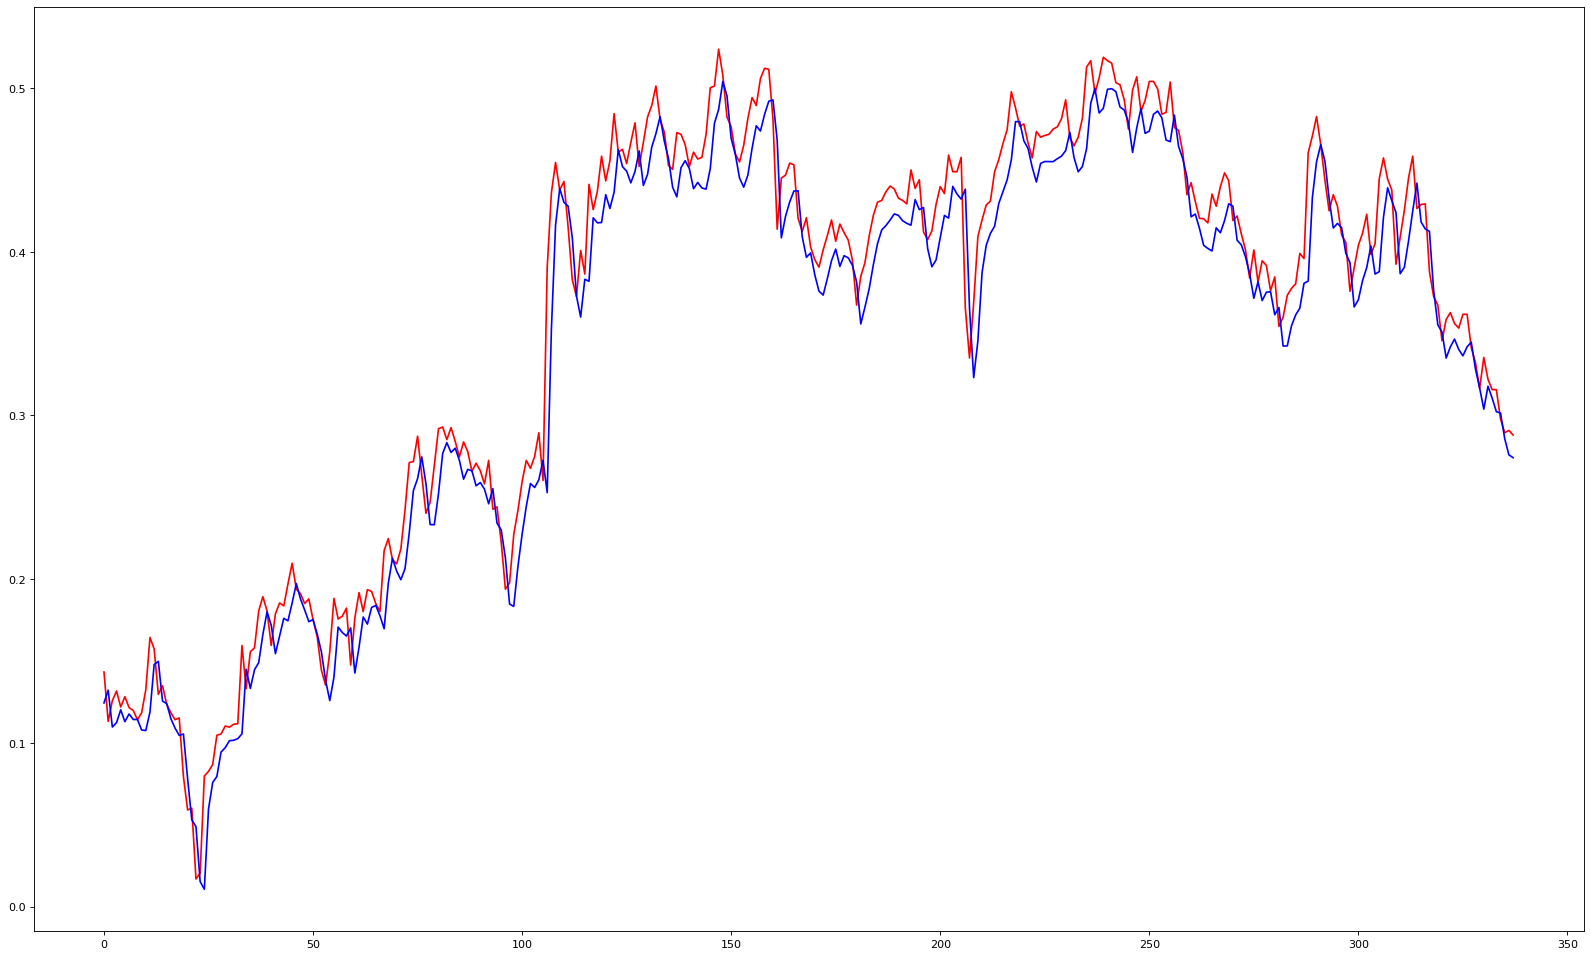

In [100]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(np.vstack(real_values), color = 'red', label = 'Real')
plt.plot(np.vstack(predictions), color = 'blue', label = 'Predicted')
plt.show()

# LSTM

Obliczenie gradientów wymaga wielu współczynników Wh plus wielokrotne obliczenia gradientu, co czyni to nieco problematycznym. Istnieją 2 główne problemy, które mogą pojawić się w RNN, które LSTM pomaga rozwiązać, czyli eksplodujące gradienty i znikające gradienty

Gradient eksplodujący jest problemem, gdy wiele wartości, które są zaangażowane w powtarzane obliczenia gradientu (takie jak macierz wag lub sam gradient), jest większych niż 1, wówczas ten problem jest znany jako gradient eksplodujący. W tym problemie gradienty stają się bardzo duże i bardzo trudno jest je zoptymalizować. Ten problem można rozwiązać za pomocą procesu znanego jako obcinanie gradientu, który zasadniczo zmniejsza gradient do mniejszych wartości.

Znikające gradienty pojawiają się, gdy wiele wartości biorących udział w powtarzanych obliczeniach gradientu (takich jak macierz wag lub sam gradient) jest zbyt małych lub mniejszych niż 1. W tym problemie gradienty stają się coraz mniejsze w miarę powtarzania się tych obliczeń. To może być poważny problem.

![picture](https://miro.medium.com/v2/resize:fit:1194/1*B0q2ZLsUUw31eEImeVf3PQ.png)
źródło: A Brief Introduction to Recurrent Neural Networks, Towards Data Science
![picture](https://blog.floydhub.com/content/images/2019/06/Slide19.JPG)







Główną ideą LSTM jest to, że wprowadza ona samozapętlanie, aby tworzyć ścieżki, w których gradienty mogą płynąć przez długi czas, czyli dłuższe sekwencje (co oznacza, że ​​gradienty nie znikną). Pomysł ten jest głównym wkładem początkowej pamięci długo-krótkoterminowej (Hochireiter i Schmidhuber, 1997). Później wprowadzono kluczowy dodatek, aby waga tej pętli była uzależniona od kontekstu, a nie stała. Może to pomóc w zmianie skali czasowej integracji. Oznacza to, że nawet jeśli LSTM ma stałe parametry, skala czasowa całkowania może się zmieniać w zależności od sekwencji wejściowej, ponieważ stałe czasowe są wyprowadzane przez sam model.

Aby uniknąć problemów z gradientami stworzono sieci LSTM (ang. Long – Short Term Memory) i GRU (ang. Gated Recurrent Unit). Sieć LSTM składa się z:
* komórki, 
* bramki wejściowej, 
* bramki wyjściowej 
* bramki zapominania.

Komórka pełni role pamięci i przechowuje stan.

Bramka wejściowa reguluje jak dużo nowych wartości może znaleźć się w komórce (to co jest umieszczane i usuwane z pamięci) (co się pojawi w Ct).

Bramka zapominania odpowiada za kontrolę w jakim stopniu nowe wartości z bramki wejściowej mogą pozostać w pamięci (komórce) – podobnie jak bramka wejściowa ( wpływ stanu Ct-1 na Ct ).

Bramka wyjściowa reguluje w jakim stopniu wartość w pamięci jest wykorzystywana do obliczenia wartości wyjściowej aktywacji komórki LSTM.



Kluczowym elementem składowym LSTM jest struktura znana jako bramki. Informacje są dodawane lub usuwane przez te bramki. Bramki mogą opcjonalnie przepuszczać informacje, na przykład przez warstwę sigmoidalną i mnożenie punktowe.

Dzięki stosowaniu bramek, które kontrolują długookresowe zależności w sekwencji udaje się uniknąć utraty pewnych kluczowych informacji zawartych w sekwencji.

GRU ma podoba konstrukcję do LSTM, różnica polega na braku bramki wyjściowej oraz pamięci C – GRU posiada bramkę resetu Rt i bramkę aktualizacji Zt
GRU posiada mniej parametrów względem LSTM przy porównywalnej jakości wyników w przypadku wielu zastosowań

![picture](https://blog.floydhub.com/content/images/2019/06/Slide20.JPG)

Bramka wejściowa decyduje o tym, jakie nowe informacje zostaną zapisane w pamięci długotrwałej. Działa tylko z informacją z bieżącego wejścia i pamięcią krótkotrwałą z poprzedniego kroku czasowego. Dlatego musi odfiltrować informacje z tych zmiennych, które nie są przydatne.


Matematycznie osiąga się to za pomocą 2 warstw. Pierwszą warstwę można postrzegać jako filtr, który wybiera, jakie informacje mogą przez nią przechodzić, a które mają zostać odrzucone. Aby utworzyć tę warstwę, przekazujemy pamięć krótkotrwałą i bieżące dane wejściowe do funkcji sigmoidalnej. Funkcja sigmoidalna przekształci wartości w zakresie od 0 do 1, przy czym 0 wskazuje, że część informacji jest nieważna, a 1 wskazuje, że informacje zostaną wykorzystane. Pomaga to w podjęciu decyzji, które wartości mają być zachowane i używane, a także wartości, które należy odrzucić. Gdy warstwa jest szkolona przez propagację wsteczną, wagi w funkcji sigmoidalnej będą aktualizowane w taki sposób, że nauczy się przepuszczać tylko użyteczne informacje, odrzucając mniej istotne.

![picture](https://blog.floydhub.com/content/images/2019/06/Slide21.JPG)

Bramka zapominania decyduje, które informacje z pamięci długotrwałej należy zachować, a które odrzucić. Odbywa się to poprzez pomnożenie przychodzącej pamięci długotrwałej przez wektor zapominania generowany przez bieżące wejście i przychodzącą pamięć krótkotrwałą.

Podobnie jak pierwsza warstwa w bramce wejściowej, wektor zapominania jest również selektywną warstwą filtrującą. Aby uzyskać wektor zapominania, pamięć krótkotrwała i prąd wejściowy są przepuszczane przez funkcję sigmoidalną, podobną do pierwszej warstwy w bramce wejściowej powyżej, ale z różnymi wagami. Wektor będzie się składał z zer i jedynek i zostanie pomnożony przez pamięć długotrwałą, aby wybrać, które części pamięci długoterminowej mają zostać zachowane.

![picture](https://blog.floydhub.com/content/images/2019/06/Slide22.JPG)

Bramka wyjściowa weźmie bieżące wejście, poprzednią pamięć krótkotrwałą i nowo obliczoną pamięć długoterminową, aby wytworzyć nową pamięć krótkotrwałą/stan ukryty, który zostanie przekazany do komórki w następnym kroku czasowym. Wyjście bieżącego kroku czasowego można również wyciągnąć z tego ukrytego stanu.

Po pierwsze, poprzednia pamięć krótkotrwała i bieżące dane wejściowe zostaną przekazane do funkcji sigmoidalnej (tak, robimy to już trzeci raz) z różnymi wagami jeszcze raz, aby utworzyć trzeci i ostatni filtr. Następnie poddajemy nową pamięć długotrwałą funkcji aktywacji tanh. Dane wyjściowe z tych 2 procesów zostaną pomnożone w celu wytworzenia nowej pamięci krótkotrwałej.

In [127]:
tf.keras.backend.clear_session()

In [128]:
model = keras.Sequential()
model.add(layers.Input(shape=(window, 1)))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [129]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=0.0005, 
                                            patience=50, 
                                            verbose=0, 
                                            mode='min', 
                                            restore_best_weights=True)

In [130]:
history = model.fit(
    train_window, 
    epochs = 100,
    callbacks=[early_stop],
    validation_data=val_window)

Epoch 1/100
14/14 [==============================] - 4s 69ms/step - loss: 0.1517 - val_loss: 0.0235
Epoch 2/100
14/14 [==============================] - 0s 33ms/step - loss: 0.0193 - val_loss: 0.0087
Epoch 3/100
14/14 [==============================] - 1s 38ms/step - loss: 0.0122 - val_loss: 0.0086
Epoch 4/100
14/14 [==============================] - 0s 31ms/step - loss: 0.0092 - val_loss: 0.0030
Epoch 5/100
14/14 [==============================] - 0s 33ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 6/100
14/14 [==============================] - 1s 38ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 7/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 8/100
14/14 [==============================] - 1s 36ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 9/100
14/14 [==============================] - 0s 31ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/100
14/14 [==============================] - 0s 32ms/step - loss: 0.0013 - val_loss: 0.0014

<Figure size 640x480 with 0 Axes>

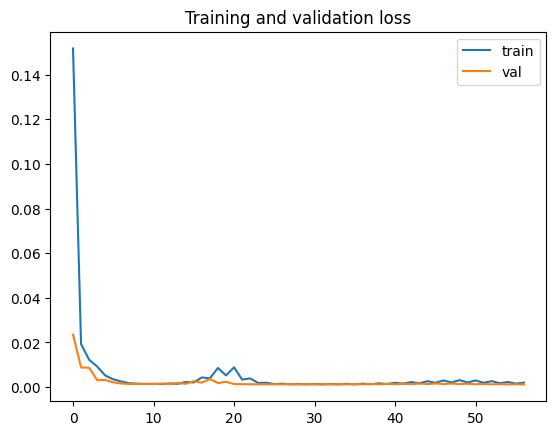

<Figure size 640x480 with 0 Axes>

In [131]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train','val'])
plt.title('Training and validation loss')
plt.figure()

In [132]:
predictions = model.predict(val_window)

4/4 [==============================] - 1s 16ms/step


In [133]:
predictions.shape

(338, 1)

In [134]:
val.close.values[window:].shape

(338,)

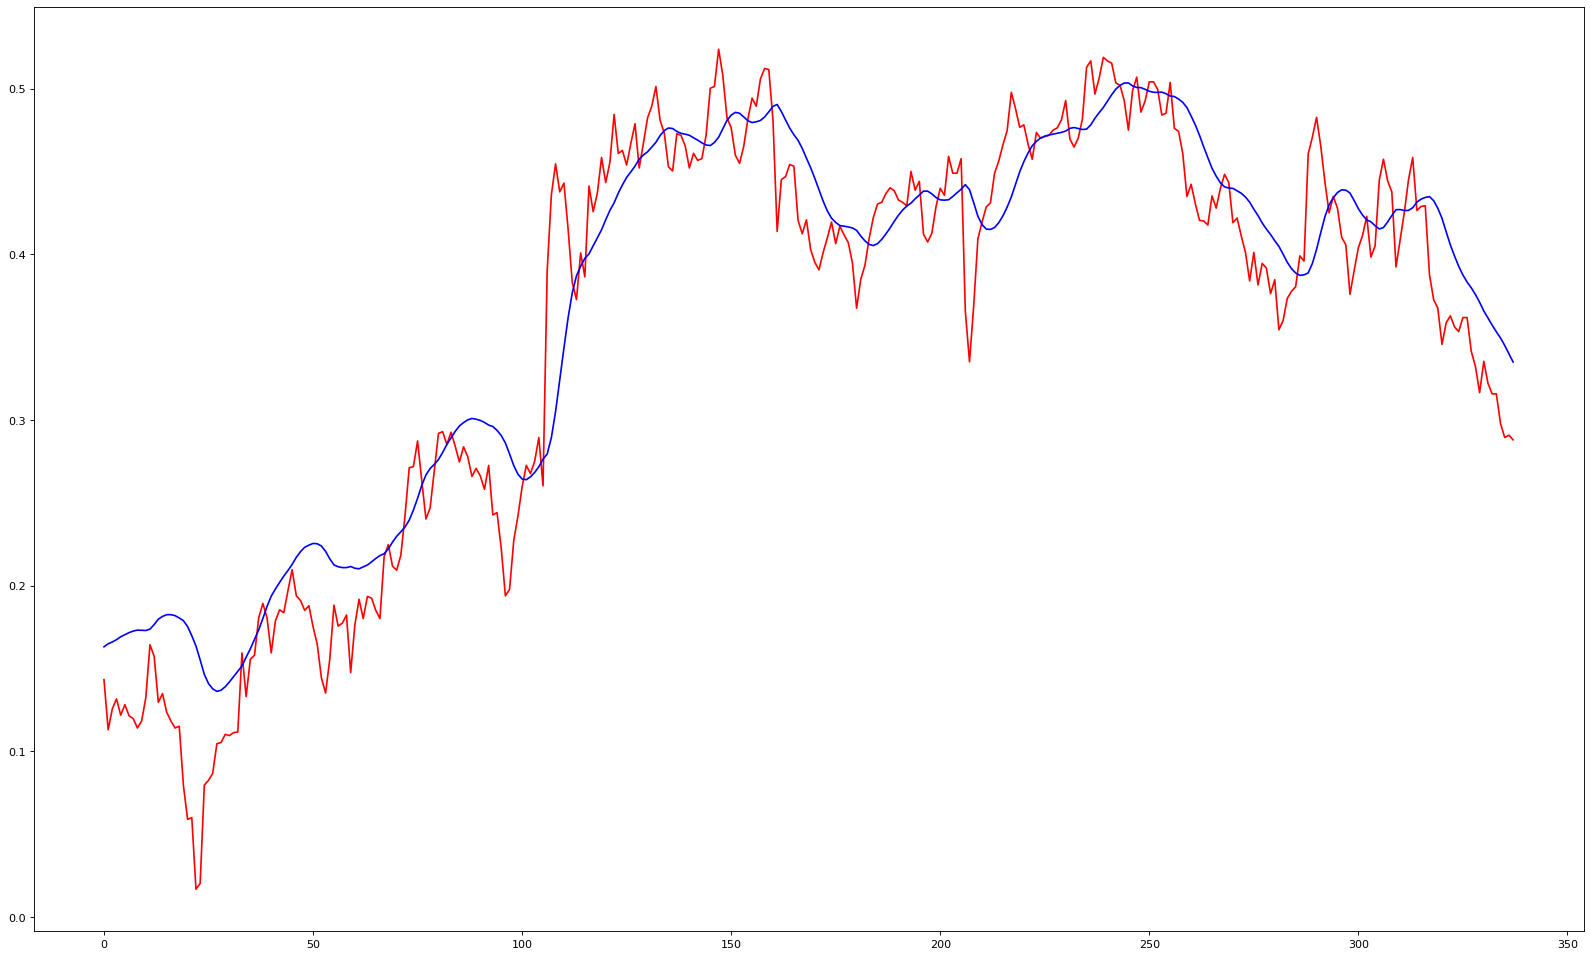

In [135]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(val.close.values[window:], color = 'red', label = 'Real')
plt.plot(predictions, color = 'blue', label = 'Predicted')
plt.show()

In [82]:
tf.keras.backend.clear_session()

In [83]:
model = keras.Sequential()
model.add(layers.Input(shape=(window, 1)))
model.add(layers.LSTM(256))
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [84]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=0.0005, 
                                            patience=50, 
                                            verbose=0, 
                                            mode='min', 
                                            restore_best_weights=True)

In [85]:
history = model.fit(
    train_window, 
    epochs = 100,
    callbacks=[early_stop],
    validation_data=val_window)

Epoch 1/100
11/11 [==============================] - 4s 157ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 2/100
11/11 [==============================] - 1s 109ms/step - loss: 0.0187 - val_loss: 0.0347
Epoch 3/100
11/11 [==============================] - 2s 146ms/step - loss: 0.0150 - val_loss: 0.0052
Epoch 4/100
11/11 [==============================] - 2s 213ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 5/100
11/11 [==============================] - 2s 154ms/step - loss: 0.0035 - val_loss: 9.0754e-04
Epoch 6/100
11/11 [==============================] - 1s 109ms/step - loss: 0.0038 - val_loss: 0.0055
Epoch 7/100
11/11 [==============================] - 1s 112ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 8/100
11/11 [==============================] - 1s 115ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 9/100
11/11 [==============================] - 1s 125ms/step - loss: 8.8917e-04 - val_loss: 9.3886e-04
Epoch 10/100
11/11 [==============================] - 2s 145ms/step - loss: 0.0

<Figure size 640x480 with 0 Axes>

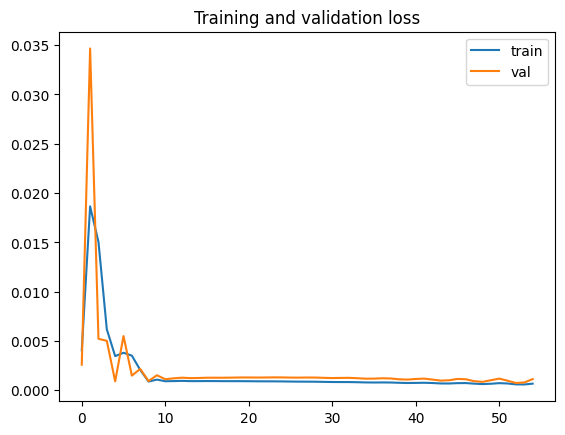

<Figure size 640x480 with 0 Axes>

In [86]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train','val'])
plt.title('Training and validation loss')
plt.figure()

In [87]:
predictions = model.predict(val_window)

4/4 [==============================] - 1s 37ms/step


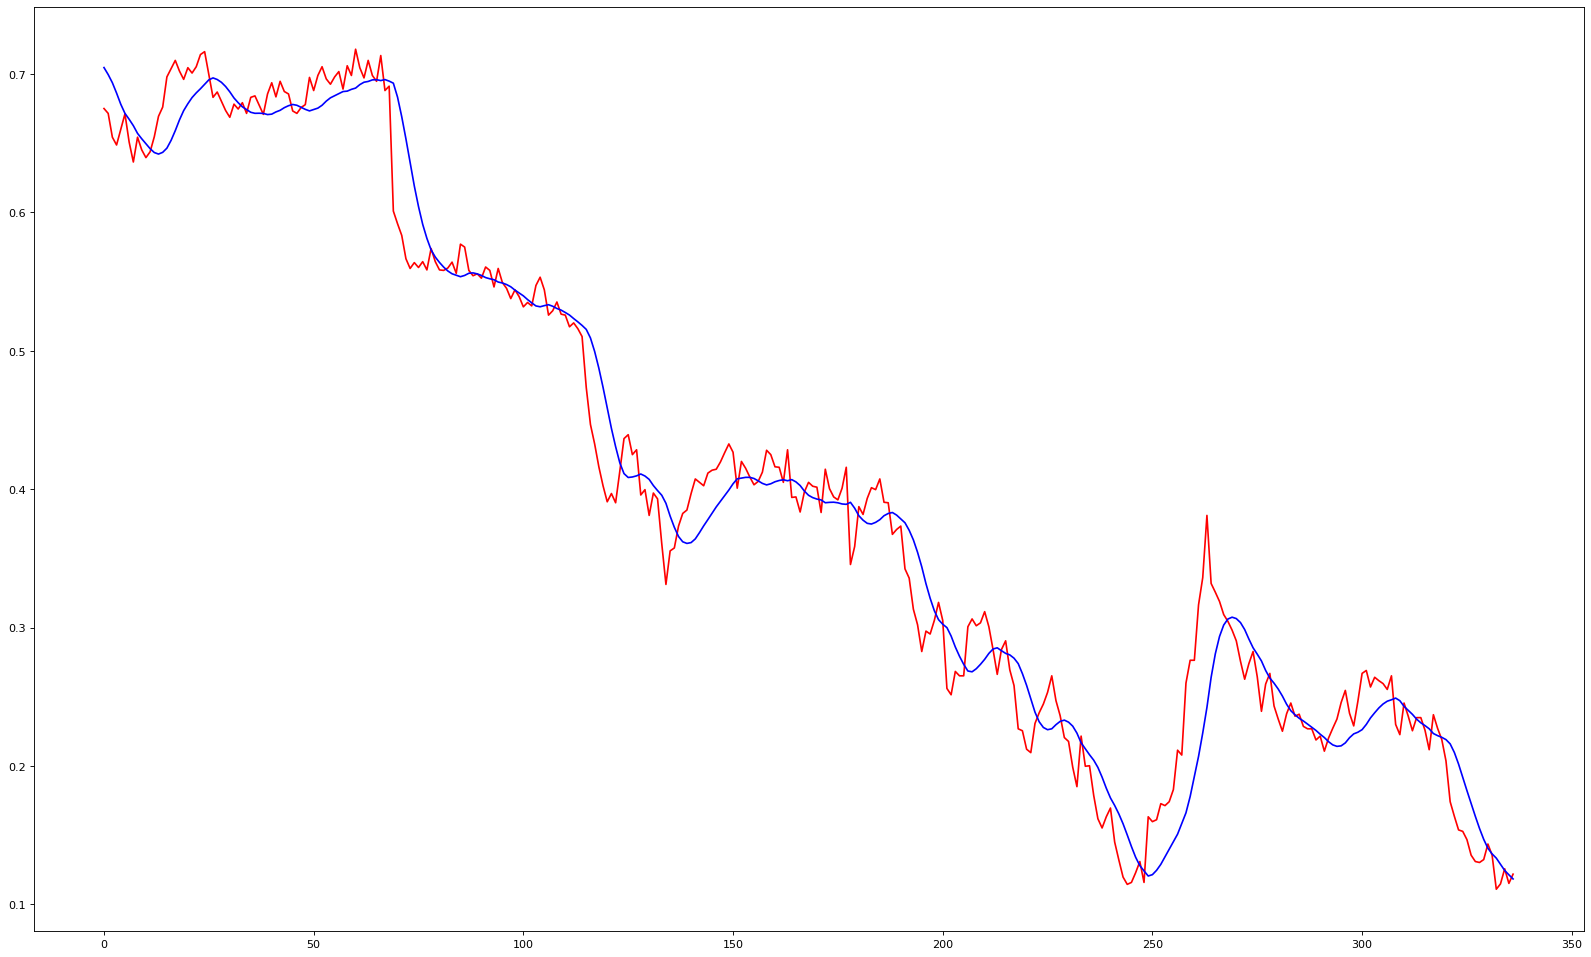

In [89]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(val.close.values[window:], color = 'red', label = 'Real')
plt.plot(predictions, color = 'blue', label = 'Predicted')
plt.show()

In [93]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=val.date.values[window:], y=predictions.reshape(len(predictions)),
            mode='markers',
            name='Predykcje'))
fig.add_trace(go.Scatter(x=val.date.values[window:], y=val.close.values[window:],
                    mode='markers',
                    name='Wartości rzeczywiste'))
fig.show()

# Jak używać warst LSTM po sobie? 

return sequeces!

In [130]:
tf.keras.backend.clear_session()

In [131]:
model = keras.Sequential()
model.add(layers.Input(shape=(window, 1)))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(256))
model.add(layers.Dense(1))
model.compile(optimizer = tf.keras.optimizers.Adam(clipvalue=1.0), loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 461,057
Trainable params: 461,057
Non-trainable params: 0
_________________________________________________________________


Zwróć uwagę na optimizer - zastosowany został tutaj tak zwany gradient clipping, który przycina wartości gradientu do określonej wartości maksymalnej (w naszym przypadku 1). Dzięki temu redukujemy prawdopodobieństwo eksplodującego gradientu.

In [132]:
history = model.fit(
    train_window, 
    epochs = 100,
    callbacks=[early_stop],
    validation_data=val_window, verbose = 1)

Epoch 1/100
11/11 [==============================] - 9s 254ms/step - loss: 0.0075 - val_loss: 0.0049
Epoch 2/100
11/11 [==============================] - 2s 178ms/step - loss: 0.0193 - val_loss: 0.0447
Epoch 3/100
11/11 [==============================] - 3s 258ms/step - loss: 0.0252 - val_loss: 0.0151
Epoch 4/100
11/11 [==============================] - 2s 184ms/step - loss: 0.0179 - val_loss: 0.0060
Epoch 5/100
11/11 [==============================] - 2s 171ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 6/100
11/11 [==============================] - 2s 173ms/step - loss: 0.0095 - val_loss: 0.0120
Epoch 7/100
11/11 [==============================] - 2s 228ms/step - loss: 0.0090 - val_loss: 0.0043
Epoch 8/100
11/11 [==============================] - 3s 288ms/step - loss: 0.0056 - val_loss: 0.0047
Epoch 9/100
11/11 [==============================] - 2s 173ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 10/100
11/11 [==============================] - 2s 171ms/step - loss: 0.0044 - val_lo

<Figure size 640x480 with 0 Axes>

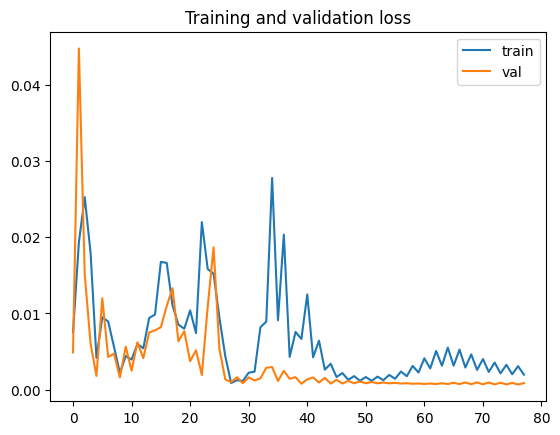

<Figure size 640x480 with 0 Axes>

In [133]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train','val'])
plt.title('Training and validation loss')
plt.figure()

In [134]:
predictions = model.predict(val_window)

4/4 [==============================] - 1s 69ms/step


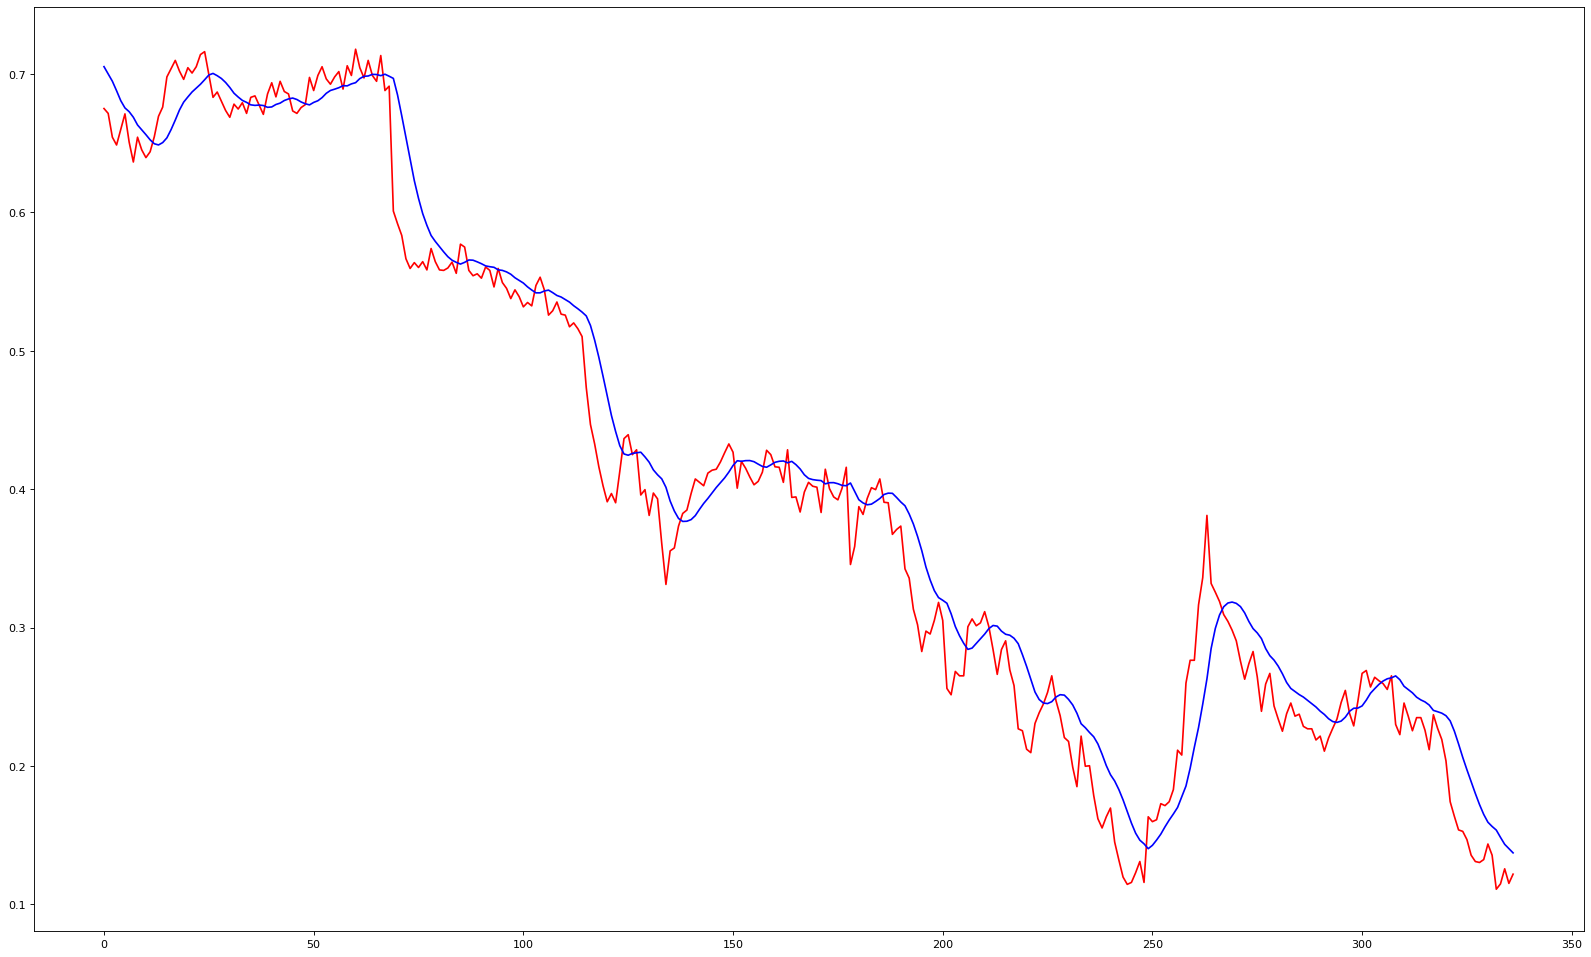

In [135]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(val.close.values[window:], color = 'red', label = 'Real')
plt.plot(predictions, color = 'blue', label = 'Predicted')
plt.show()

### Zadanie

 

1.   Zmodyfikuj data loader oraz architekturę sieci, aby na podstawie ostatnich 10 obserwacji przewidywać 5 następnych okresów.
2.   Stwórz sieć o 3 warstwach LSTM oddzielonych od siebie warstwami dropout.




## LSTM w pytorch

In [ ]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [103]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super().__init__()
        self.input_dim = input_dim
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.num_layers = num_layers
        
        # LSTM
        self.lstm = nn.LSTM(input_size=self.input_dim, hidden_size=self.hidden_dim, num_layers=self.num_layers, batch_first=True, dropout = 0.2)
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)
        out = self.fc(out[:, -1, :]) 
        return out

In [109]:
train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), shuffle=True, batch_size=8)
val_loader = DataLoader(TensorDataset(X_val_torch , y_val_torch), shuffle=True, batch_size=8)

In [110]:
model = LSTMModel(input_dim = 1, hidden_dim = 32, num_layers = 3, output_dim = 1)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
n_epochs = 100
early_stopping = EarlyStopping(patience=50, min_delta=0.0001)
lr = 0.001

In [111]:
for epoch in range(n_epochs):
      print(f"Epoch {epoch+1}\n-------------------------------")
      train_loop(train_loader, model, loss_fn, optimizer, epoch, lr)
      test_loss = test_loop(val_loader, model, loss_fn, epoch, lr)
      if early_stopping(validation_loss = test_loss, model = model):
        print(f'\n-------------------------------\nEarly stopped at epoch {epoch+1}')
        model.load_state_dict(early_stopping.best_weights)
        break

Epoch 1
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 257.91it/s, loss: 0.015345082274341787, [352/352]]


Epoch 2
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 255.52it/s, loss: 0.0018231759022455662, [352/352]]


Epoch 3
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 206.58it/s, loss: 0.0007458897396810988, [352/352]]


Epoch 4
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 213.05it/s, loss: 0.0004766998096205167, [352/352]]


Epoch 5
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 233.31it/s, loss: 0.000427772271161137, [352/352]]


Epoch 6
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 202.23it/s, loss: 0.0003924620065266605, [352/352]]


Epoch 7
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 256.63it/s, loss: 0.0003852154406393476, [352/352]]


Epoch 8
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 236.80it/s, loss: 0.00047750385965628084, [352/352]]


Epoch 9
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 249.49it/s, loss: 0.0004096241608832233, [352/352]]


Epoch 10
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 232.98it/s, loss: 0.00038725305140277754, [352/352]]


Epoch 11
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 275.25it/s, loss: 0.00038649830201558706, [352/352]]


Epoch 12
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 266.76it/s, loss: 0.000418150850733086, [352/352]]


Epoch 13
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 264.00it/s, loss: 0.0004647024103509135, [352/352]]


Epoch 14
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 277.72it/s, loss: 0.0003807287167877472, [352/352]]


Epoch 15
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 263.26it/s, loss: 0.0004052787608915506, [352/352]]


Epoch 16
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 255.10it/s, loss: 0.00043812777221319266, [352/352]]


Epoch 17
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 263.93it/s, loss: 0.0005122167349327356, [352/352]]


Epoch 18
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 283.27it/s, loss: 0.0003758099286311666, [352/352]]


Epoch 19
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 275.36it/s, loss: 0.00044257017560250296, [352/352]]


Epoch 20
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 230.88it/s, loss: 0.000415272550691787, [352/352]]


Epoch 21
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 251.24it/s, loss: 0.0005028367426844356, [352/352]]


Epoch 22
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 213.18it/s, loss: 0.00037439229477472094, [352/352]]


Epoch 23
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 237.46it/s, loss: 0.00039837999660945076, [352/352]]


Epoch 24
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 260.98it/s, loss: 0.0003763703996148913, [352/352]]


Epoch 25
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 256.64it/s, loss: 0.0004071040447425648, [352/352]]


Epoch 26
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 240.22it/s, loss: 0.0005090640800269532, [352/352]]


Epoch 27
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 234.19it/s, loss: 0.0004537053130413617, [352/352]]


Epoch 28
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 233.14it/s, loss: 0.00036972517376522194, [352/352]]


Epoch 29
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 207.26it/s, loss: 0.00037040131345830474, [352/352]]


Epoch 30
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 67.55it/s, loss: 0.00038520782378658293, [352/352]]


Epoch 31
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 247.97it/s, loss: 0.0003853872905727423, [352/352]]


Epoch 32
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 222.98it/s, loss: 0.0003860971386199129, [352/352]]


Epoch 33
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 269.32it/s, loss: 0.000589208372151585, [352/352]]


Epoch 34
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 243.52it/s, loss: 0.0003849748336506309, [352/352]]


Epoch 35
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 264.09it/s, loss: 0.00041110931322856976, [352/352]]


Epoch 36
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 234.37it/s, loss: 0.00040340637596355833, [352/352]]


Epoch 37
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 272.95it/s, loss: 0.00039633432441570966, [352/352]]


Epoch 38
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 274.11it/s, loss: 0.0004749784235503863, [352/352]]


Epoch 39
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 222.11it/s, loss: 0.0003703066745815291, [352/352]]


Epoch 40
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 234.69it/s, loss: 0.00039690450020399027, [352/352]]


Epoch 41
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 238.46it/s, loss: 0.00038197605168864936, [352/352]]


Epoch 42
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 231.54it/s, loss: 0.0009093703248998446, [352/352]]


Epoch 43
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 264.93it/s, loss: 0.00037683744821234456, [352/352]]


Epoch 44
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 270.41it/s, loss: 0.00037482707838617813, [352/352]]


Epoch 45
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 245.25it/s, loss: 0.0003726303707067431, [352/352]]


Epoch 46
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 271.24it/s, loss: 0.00044972617549567735, [352/352]]


Epoch 47
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 300.21it/s, loss: 0.000425595392781278, [352/352]]


Epoch 48
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 259.99it/s, loss: 0.0004253899473538199, [352/352]]


Epoch 49
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 225.26it/s, loss: 0.0003676716139373391, [352/352]]


Epoch 50
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 275.62it/s, loss: 0.00039623010012622797, [352/352]]


Epoch 51
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 265.33it/s, loss: 0.0003900607521658954, [352/352]]


Epoch 52
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 295.19it/s, loss: 0.0007246643574696711, [352/352]]


Epoch 53
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 285.40it/s, loss: 0.00036948458562785, [352/352]]


Epoch 54
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 286.94it/s, loss: 0.0003961225862770913, [352/352]]


Epoch 55
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 301.46it/s, loss: 0.0003890979313093174, [352/352]]


Epoch 56
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 268.56it/s, loss: 0.0003708015895178753, [352/352]]


Epoch 57
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 278.88it/s, loss: 0.0005209706249099162, [352/352]]


Epoch 58
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 235.10it/s, loss: 0.00036858210660284385, [352/352]]


Epoch 59
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 285.00it/s, loss: 0.0003676615884945601, [352/352]]


Epoch 60
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 224.21it/s, loss: 0.00039479042077966204, [352/352]]


Epoch 61
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 305.14it/s, loss: 0.0003722178463993425, [352/352]]


Epoch 62
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 311.53it/s, loss: 0.00039471976610498547, [352/352]]


Epoch 63
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 301.55it/s, loss: 0.0003663522027802008, [352/352]]


Epoch 64
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 268.74it/s, loss: 0.00037514969856353923, [352/352]]


Epoch 65
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 265.45it/s, loss: 0.0004154186960725135, [352/352]]


Epoch 66
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 240.18it/s, loss: 0.00037926035574028816, [352/352]]


Epoch 67
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 285.59it/s, loss: 0.00041722291776254264, [352/352]]


Epoch 68
-------------------------------


Validation: 100%|██████████| 44/44 [00:00<00:00, 276.90it/s, loss: 0.0005880544234638695, [352/352]]


-------------------------------
Early stopped at epoch 68


In [112]:
predictions = model(Variable(X_val_torch.view(-1, 1, 1)))

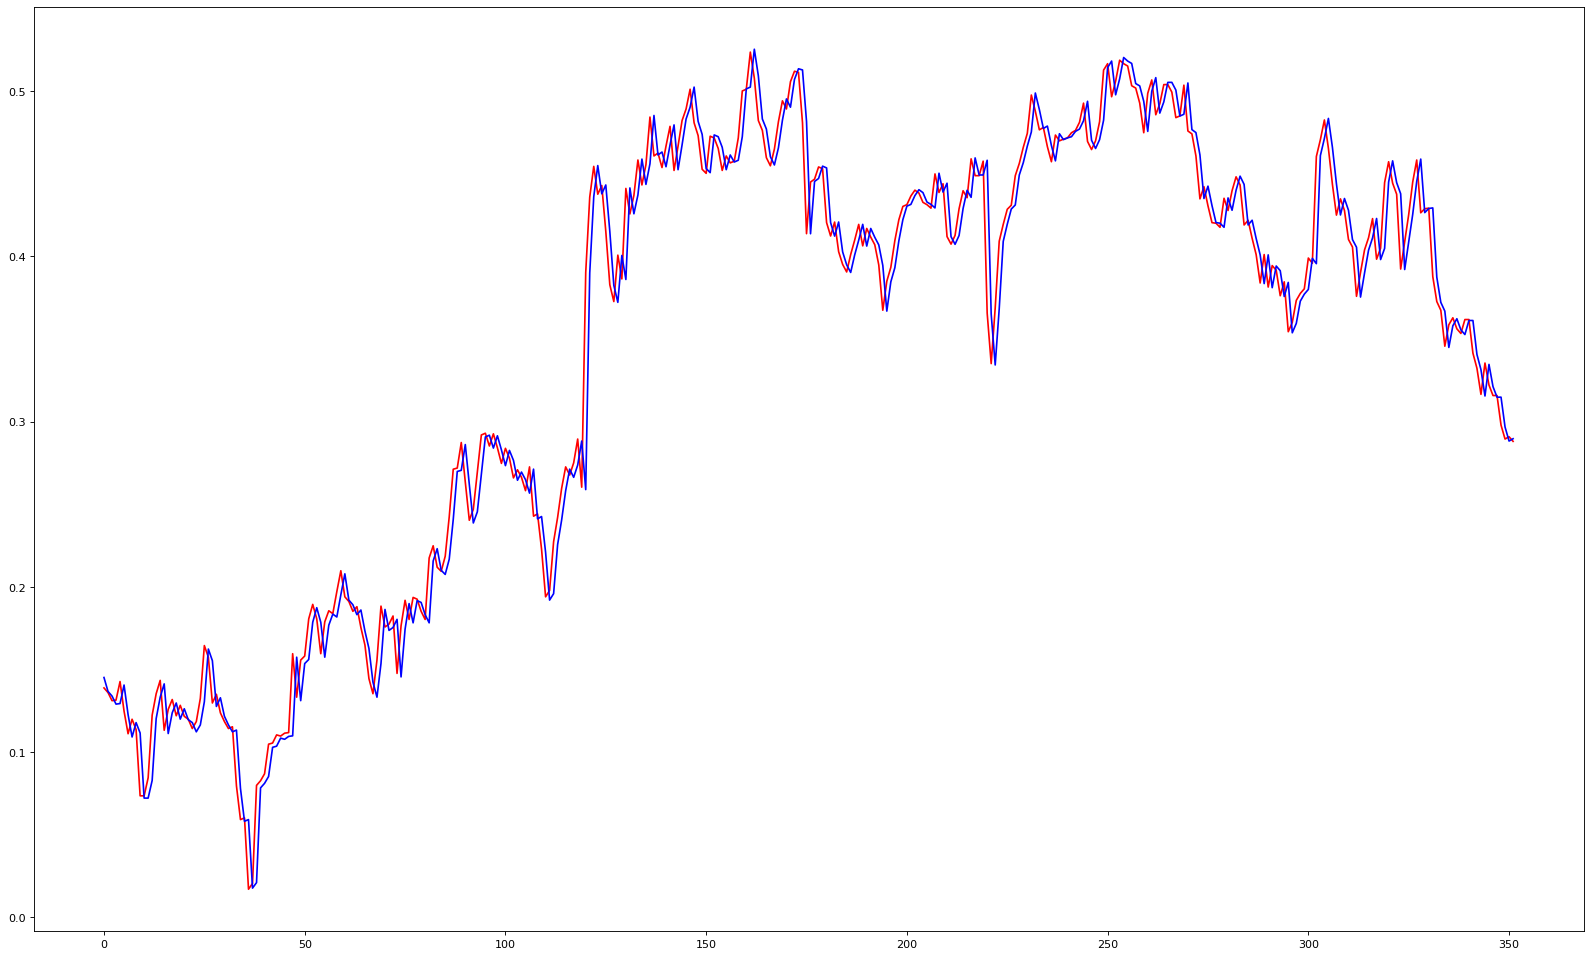

In [113]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(y_val.close.values, color = 'red', label = 'Real')
plt.plot(predictions.detach().numpy(), color = 'blue', label = 'Predicted')
plt.show()

In [136]:
train_loader = DataLoader(TimeseriesDataset(X_train_torch, y_train_torch, window=window), shuffle=True, batch_size=8) # w modelowaniu zamien na True
val_loader = DataLoader(TimeseriesDataset(X_val_torch , y_val_torch, window=window), shuffle=True, batch_size=8)

In [138]:
model = LSTMModel(input_dim = window, hidden_dim = 32, num_layers = 2, output_dim = 1)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
n_epochs = 100
early_stopping = EarlyStopping(patience=50, min_delta=0.0001)
lr = 0.001

In [139]:
for epoch in range(n_epochs):
      print(f"Epoch {epoch+1}\n-------------------------------")
      train_loop(train_loader, model, loss_fn, optimizer, epoch, lr)
      test_loss = test_loop(val_loader, model, loss_fn, epoch, lr)
      if early_stopping(validation_loss = test_loss, model = model):
        print(f'\n-------------------------------\nEarly stopped at epoch {epoch+1}')
        model.load_state_dict(early_stopping.best_weights)
        break

Epoch 1
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 276.43it/s, loss: 0.0016278864668281532, [338/338]]


Epoch 2
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 261.49it/s, loss: 0.0015225568711811806, [338/338]]


Epoch 3
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 237.23it/s, loss: 0.0019079232315984988, [338/338]]


Epoch 4
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 241.98it/s, loss: 0.0013506521520253575, [338/338]]


Epoch 5
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 226.40it/s, loss: 0.0013133653535691717, [338/338]]


Epoch 6
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 279.19it/s, loss: 0.0012769530443366357, [338/338]]


Epoch 7
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 242.80it/s, loss: 0.0009969824038075046, [338/338]]


Epoch 8
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 264.44it/s, loss: 0.0009008727640828638, [338/338]]


Epoch 9
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 276.50it/s, loss: 0.0008555866634408229, [338/338]]


Epoch 10
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 242.83it/s, loss: 0.0007579518254673065, [338/338]]


Epoch 11
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 262.80it/s, loss: 0.0007326270042117252, [338/338]]


Epoch 12
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 225.06it/s, loss: 0.0008431559054283859, [338/338]]


Epoch 13
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 240.05it/s, loss: 0.0006762298469047257, [338/338]]


Epoch 14
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 264.46it/s, loss: 0.0007610864381286922, [338/338]]


Epoch 15
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 200.26it/s, loss: 0.0006439227175622702, [338/338]]


Epoch 16
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 240.08it/s, loss: 0.0006800545934522741, [338/338]]


Epoch 17
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 244.95it/s, loss: 0.000658346843962601, [338/338]]


Epoch 18
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 215.27it/s, loss: 0.0006191983815962124, [338/338]]


Epoch 19
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 262.11it/s, loss: 0.0006320597647911285, [338/338]]


Epoch 20
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 291.72it/s, loss: 0.0010765475951281355, [338/338]]


Epoch 21
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 275.97it/s, loss: 0.000608052538916317, [338/338]]


Epoch 22
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 275.85it/s, loss: 0.0005731050339310841, [338/338]]


Epoch 23
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 283.23it/s, loss: 0.0005572533267441878, [338/338]]


Epoch 24
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 224.45it/s, loss: 0.0005836816055180375, [338/338]]


Epoch 25
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 300.04it/s, loss: 0.0005473513003888128, [338/338]]


Epoch 26
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 235.44it/s, loss: 0.0008765950908635331, [338/338]]


Epoch 27
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 238.63it/s, loss: 0.0006851980552012318, [338/338]]


Epoch 28
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 252.43it/s, loss: 0.0005280342708385094, [338/338]]


Epoch 29
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 248.32it/s, loss: 0.0005427191390481312, [338/338]]


Epoch 30
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 292.07it/s, loss: 0.0005398233599492435, [338/338]]


Epoch 31
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 263.99it/s, loss: 0.0005205223618716889, [338/338]]


Epoch 32
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 290.63it/s, loss: 0.0004946010884068105, [338/338]]


Epoch 33
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 195.71it/s, loss: 0.0005799759262942623, [338/338]]


Epoch 34
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 232.24it/s, loss: 0.0006318117967714708, [338/338]]


Epoch 35
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 237.58it/s, loss: 0.0007077221502143846, [338/338]]


Epoch 36
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 240.41it/s, loss: 0.0005762772272519637, [338/338]]


Epoch 37
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 215.73it/s, loss: 0.00048555578693996597, [338/338]]


Epoch 38
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 219.90it/s, loss: 0.0005806927049064164, [338/338]]


Epoch 39
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 281.46it/s, loss: 0.0005890870277991865, [338/338]]


Epoch 40
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 275.22it/s, loss: 0.0005453524992294977, [338/338]]


Epoch 41
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 278.19it/s, loss: 0.0006389186132447469, [338/338]]


Epoch 42
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 268.63it/s, loss: 0.000473717935630364, [338/338]]


Epoch 43
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 235.88it/s, loss: 0.0007149821609599775, [338/338]]


Epoch 44
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 221.15it/s, loss: 0.0005054092826592455, [338/338]]


Epoch 45
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 205.15it/s, loss: 0.00048805435907588407, [338/338]]


Epoch 46
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 293.97it/s, loss: 0.0004986941939298345, [338/338]]


Epoch 47
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 263.38it/s, loss: 0.00048260635467581883, [338/338]]


Epoch 48
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 255.99it/s, loss: 0.0004693741375799724, [338/338]]


Epoch 49
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 279.68it/s, loss: 0.0004928029187329569, [338/338]]


Epoch 50
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 314.15it/s, loss: 0.0005303867539285335, [338/338]]


Epoch 51
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 246.88it/s, loss: 0.000622325494437381, [338/338]]


Epoch 52
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 253.48it/s, loss: 0.0004571429741444326, [338/338]]


Epoch 53
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 220.40it/s, loss: 0.000524498317201167, [338/338]]


Epoch 54
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 234.95it/s, loss: 0.0004577395842250891, [338/338]]


Epoch 55
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 252.52it/s, loss: 0.000475825583381202, [338/338]]


Epoch 56
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 254.34it/s, loss: 0.0005255808497421703, [338/338]]


Epoch 57
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 236.65it/s, loss: 0.0004480676893023016, [338/338]]


Epoch 58
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 243.71it/s, loss: 0.0005696804562534834, [338/338]]


Epoch 59
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 274.13it/s, loss: 0.000459041975307966, [338/338]]


Epoch 60
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 322.51it/s, loss: 0.0004684171728386414, [338/338]]


Epoch 61
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 302.02it/s, loss: 0.000532426395545562, [338/338]]


Epoch 62
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 227.29it/s, loss: 0.0004872511207670255, [338/338]]


Epoch 63
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 239.88it/s, loss: 0.0004443385042514121, [338/338]]


Epoch 64
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 235.18it/s, loss: 0.00044020879770044323, [338/338]]


Epoch 65
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 259.18it/s, loss: 0.0004518833302427083, [338/338]]


Epoch 66
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 196.74it/s, loss: 0.0004584619355439425, [338/338]]


Epoch 67
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 226.23it/s, loss: 0.0005031550894653814, [338/338]]


Epoch 68
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 216.94it/s, loss: 0.0004664941753976881, [338/338]]


Epoch 69
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 233.54it/s, loss: 0.00048549585157753577, [338/338]]


Epoch 70
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 227.79it/s, loss: 0.0004266742690708989, [338/338]]


Epoch 71
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 270.58it/s, loss: 0.0004948259721818748, [338/338]]


Epoch 72
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 239.95it/s, loss: 0.00043173678077860236, [338/338]]


Epoch 73
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 242.03it/s, loss: 0.0004605054773280646, [338/338]]


Epoch 74
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 274.24it/s, loss: 0.0004359122423582364, [338/338]]


Epoch 75
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 223.81it/s, loss: 0.0004261856891727887, [338/338]]


Epoch 76
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 244.85it/s, loss: 0.00043002778761018457, [338/338]]


Epoch 77
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 237.29it/s, loss: 0.0004522671752479361, [338/338]]


Epoch 78
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 198.89it/s, loss: 0.0006735875833201558, [338/338]]


Epoch 79
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 263.35it/s, loss: 0.0005861051687916611, [338/338]]


Epoch 80
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 250.44it/s, loss: 0.0007369951595454802, [338/338]]


Epoch 81
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 276.91it/s, loss: 0.0004357524950708382, [338/338]]


Epoch 82
-------------------------------


Validation: 100%|██████████| 43/43 [00:00<00:00, 237.20it/s, loss: 0.0004565105745589177, [338/338]]


-------------------------------
Early stopped at epoch 82


In [140]:
val_loader = DataLoader(TimeseriesDataset(X_val_torch , y_val_torch, window=window), shuffle=False, batch_size=8)

In [141]:
predictions = []
real_values = []
for X_batch, y_batch in (pbar := tqdm(val_loader, desc = 'Validation: ')):
  X_batch = Variable(X_batch.view(-1, 1, X_batch.size(1)))
  predictions.append(model(X_batch).detach().numpy())
  real_values.append(y_batch.detach().numpy())

Validation: 100%|██████████| 43/43 [00:00<00:00, 1251.01it/s]


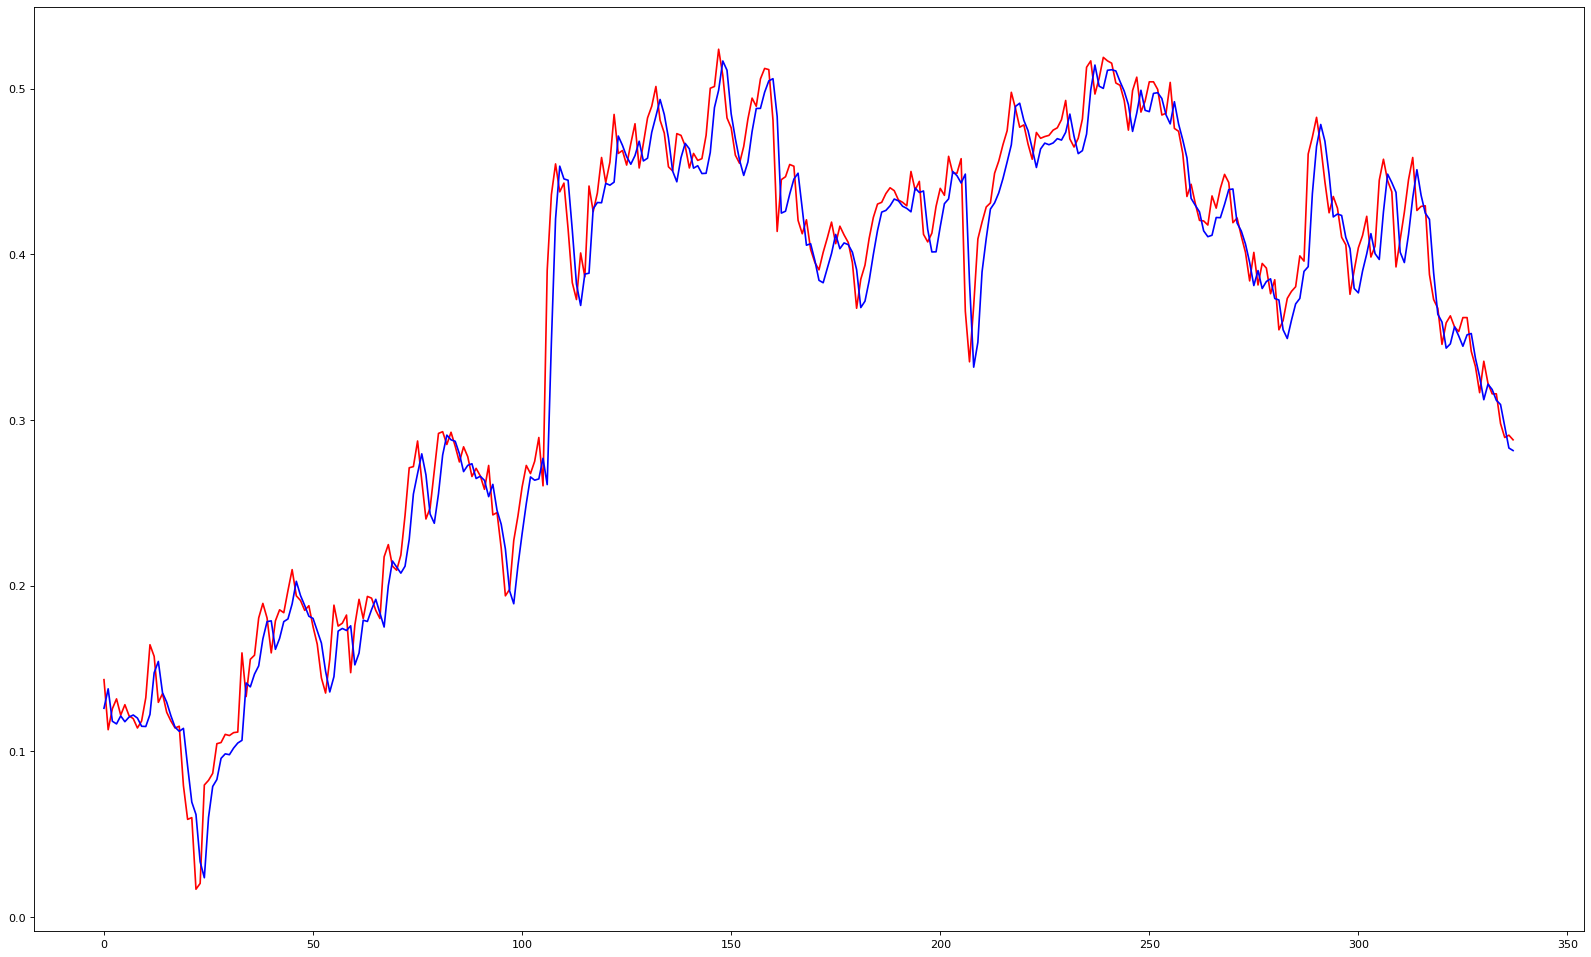

In [142]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(np.vstack(real_values), color = 'red', label = 'Real')
plt.plot(np.vstack(predictions), color = 'blue', label = 'Predicted')
plt.show()

# TODO

https://www.kaggle.com/code/frlemarchand/covid-19-forecasting-with-an-rnn#3.-Build-the-model